In [1]:
import pandas as pd    #Import the pandas module

/home/sridhatta/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [106]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv') #Load the loan.csv file

/home/sridhatta/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
f = open('Loan behaviour variables.txt')  #Load the file with behaviour columns

In [4]:
behav_var = f.read().split(',') # Split the string into array wrt ','

In [5]:
behav_var  # Behaviour columns which are to be removed

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [6]:
df1 = df.drop(behav_var, axis = 1)  #Dropping the columns with behaviour variables which are not available at the time of loan application

In [7]:
df2 = df1.dropna(axis='columns', how='all', thresh=None, subset=None, inplace=False) # Dropping the columns with all NA values

In [8]:
df3 = df2[df2.loc[:,'loan_status']!='Current']  #Excluding the rows of the data with loan_status=Current as they don't contribute to analysis of loan defaulters

In [9]:
lov = ['id',
'member_id',
'pymnt_plan',
'url',
'desc',
'title',
'initial_list_status',
'next_pymnt_d',
'collections_12_mths_ex_med',
'policy_code',
'acc_now_delinq',
'chargeoff_within_12_mths',
'delinq_amnt',
'tax_liens',
'emp_title',
'zip_code'
]                             # list for removing the columns with redundant data which does not have important information contributing to loan applicants
                            # These variables have lesser or redundant information for the analysis

In [10]:
df4 = df3.drop(lov, axis = 1)  #Droppping the variable columns of redundant information
df4

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
5           5000         5000           5000.0   36 months    7.90%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+ years           RENT     24000.0   
1            59.83     C        C4   < 1 year           RENT     30000.0   
2            84.33     C        C5  10+ years           RENT     12252.0   
3           339.31     C        C1  10+ years           RENT     49200.0   
5           156.46     A        A4    3 years           RENT     36000.0   
...            ...   ...       ...        ...            ...         ...   
39712        78.42     A        A4    4 years       MORTGAGE    110000.0   
39713       275.38     C        C1    3 years           RENT     18000.0   
39714       156.84     A        A4   < 1 year       MORTGAGE    100000.0   
39715       155.38     A        A2   < 1 year       MORTGAGE    200000.0   
39716       255.43     E        E2   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status             purpose addr_state  \
0                Verified  Dec-11   Fully Paid         credit_card         AZ   
1         Source Verified  Dec-11  Charged Off                 car         GA   
2            Not Verified  Dec-11   Fully Paid      small_business         IL   
3         Source Verified  Dec-11   Fully Paid               other         CA   
5         Source Verified  Dec-11   Fully Paid             wedding         AZ   
...                   ...     ...          ...                 ...        ...   
39712        Not Verified  Jul-07   Fully Paid    home_improvement         CO   
39713        Not Verified  Jul-07   Fully Paid         credit_card         NC   
39714        Not Verified  Jul-07   Fully Paid  debt_consolidation         MA   
39715        Not Verified  Jul-07   Fully Paid               other         MD   
39716        Not Verified  Jun-07   Fully Paid  debt_consolidation         MA   

         dti  mths_since_last_delinq  mths_since_last_record  \
0      27.65                     NaN                     NaN   
1       1.00                     NaN                     NaN   
2       8.72                     NaN                     NaN   
3      20.00                    35.0                     NaN   
5      11.20                     NaN                     NaN   
...      ...                     ...                     ...   
39712  11.33                     0.0                     0.0   
39713   6.40                     5.0                     0.0   
39714   2.30                     0.0                     0.0   
39715   3.72                     0.0                     0.0   
39716  14.29                    11.0                     0.0   

       pub_rec_bankruptcies  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
5                       0.0  
...                     ...  
39712                   NaN  
39713                   NaN  
39714                   NaN  
39715                   NaN  
39716                   NaN  

[38577 rows x 20 columns]

In [11]:
print(df4.info())  #Information of existing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  issue_d                 38577 non-null  object 
 13  loan_status             38577 non-null  object 
 14  purpose                 38577 non-null

In [12]:
df4.isnull().sum()  #Calculating the number of null values

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
mths_since_last_delinq    24905
mths_since_last_record    35837
pub_rec_bankruptcies        697
dtype: int64

In [13]:
df5 = df4.drop(['mths_since_last_record'], axis = 1) #As the months of last records variable has 92.89% NA values hence dropped

In [14]:
df5.describe()  #Describing the dataframe with quantitative type with info od count,quantile,min,max etc.

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123    322.466318   
std     7348.441646   7090.306027      7022.720644    208.639215   
min      500.000000    500.000000         0.000000     15.690000   
25%     5300.000000   5200.000000      5000.000000    165.740000   
50%     9600.000000   9550.000000      8733.440000    277.860000   
75%    15000.000000  15000.000000     14000.000000    425.550000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti  mths_since_last_delinq  \
count  3.857700e+04  38577.000000            13672.000000   
mean   6.877797e+04     13.272727               35.882534   
std    6.421868e+04      6.673044               22.028093   
min    4.000000e+03      0.000000                0.000000   
25%    4.000000e+04      8.130000               18.000000   
50%    5.886800e+04     13.370000               34.000000   
75%    8.200000e+04     18.560000               52.000000   
max    6.000000e+06     29.990000              120.000000   

       pub_rec_bankruptcies  
count          37880.000000  
mean               0.043479  
std                0.204583  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                2.000000

In [15]:
%matplotlib inline  #Inline matplotlib

array([[<AxesSubplot:title={'center':'loan_amnt'}>]], dtype=object)

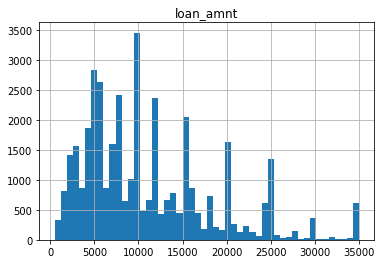

In [16]:
df5.hist(column='loan_amnt',bins=50) # Histogram of loan amount variable

<AxesSubplot:ylabel='Density'>

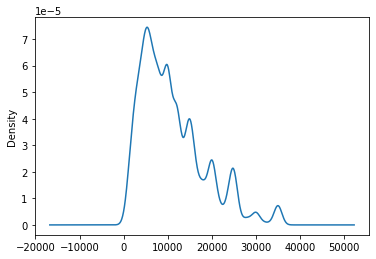

In [17]:
df5['loan_amnt'].plot.density() #PDF plot of loan amount

The Maximum number of loan is drafted within Rs.15000

<AxesSubplot:>

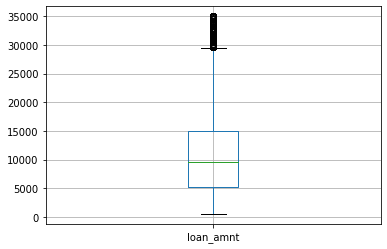

In [18]:
df5.boxplot(column='loan_amnt')   #Box Plot of loan amount

The box plot also hints the population of loan is higher within Rs.15,000

array([[<AxesSubplot:title={'center':'funded_amnt'}>]], dtype=object)

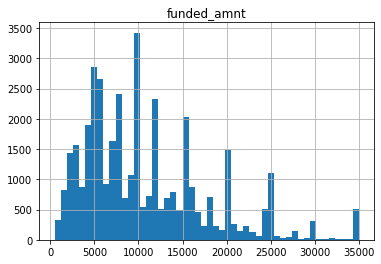

In [19]:
df5.hist(column='funded_amnt',bins=50)   #Histogram Plot of funded amount

<AxesSubplot:ylabel='Density'>

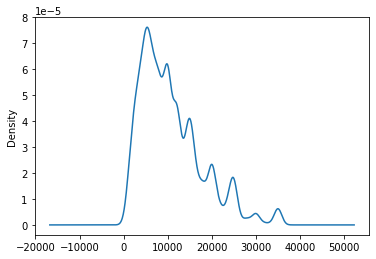

In [20]:
df5['funded_amnt'].plot.density()        #PDF plot of Funded amount

The Maximum amount of loan funded is drafted within Rs.15000

<AxesSubplot:>

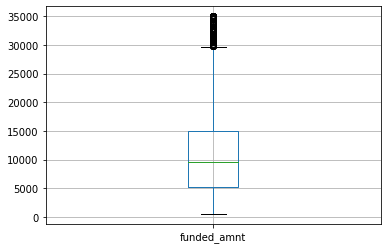

In [21]:
df5.boxplot(column='funded_amnt')      #Box Plot of Funded amount

The box plot also hints the population of funded amount is higher within Rs.15,000

array([[<AxesSubplot:title={'center':'funded_amnt_inv'}>]], dtype=object)

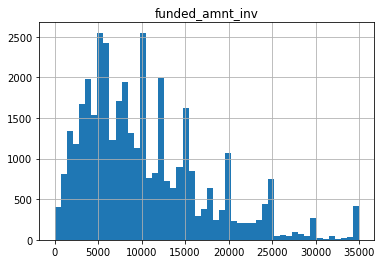

In [22]:
df5.hist(column='funded_amnt_inv',bins=50)     #Histogram plot of Investment of Funded amount

<AxesSubplot:ylabel='Density'>

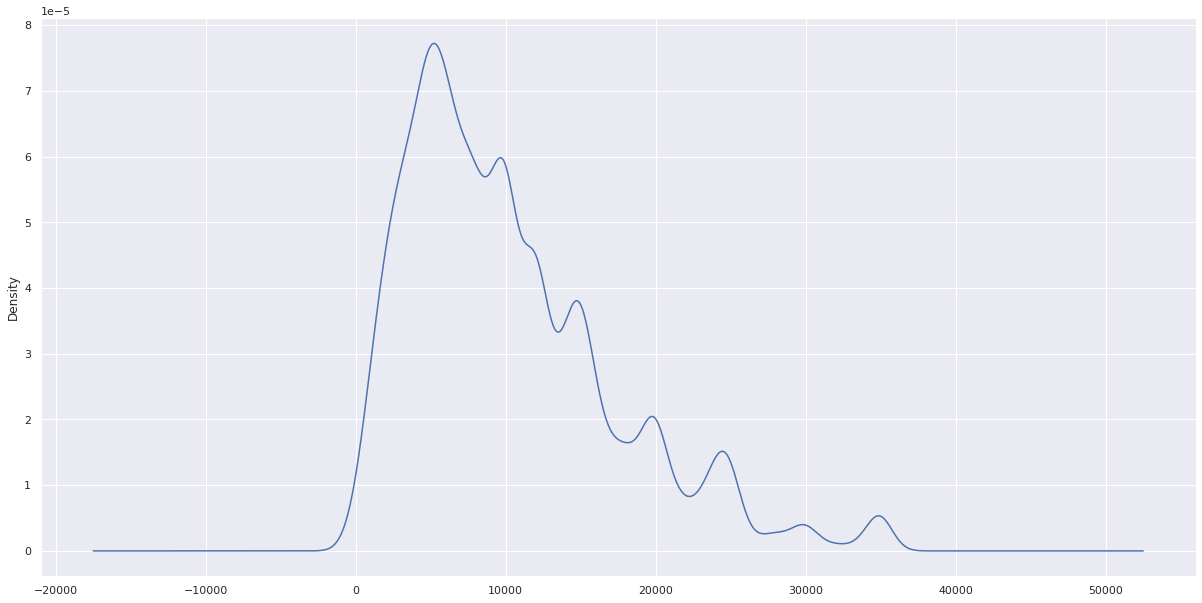

In [137]:
df5['funded_amnt_inv'].plot.density()       #PDF plot of Investment of Funded amount

The Maximum loan amount of funded invested is drafted within Rs.15000

<AxesSubplot:>

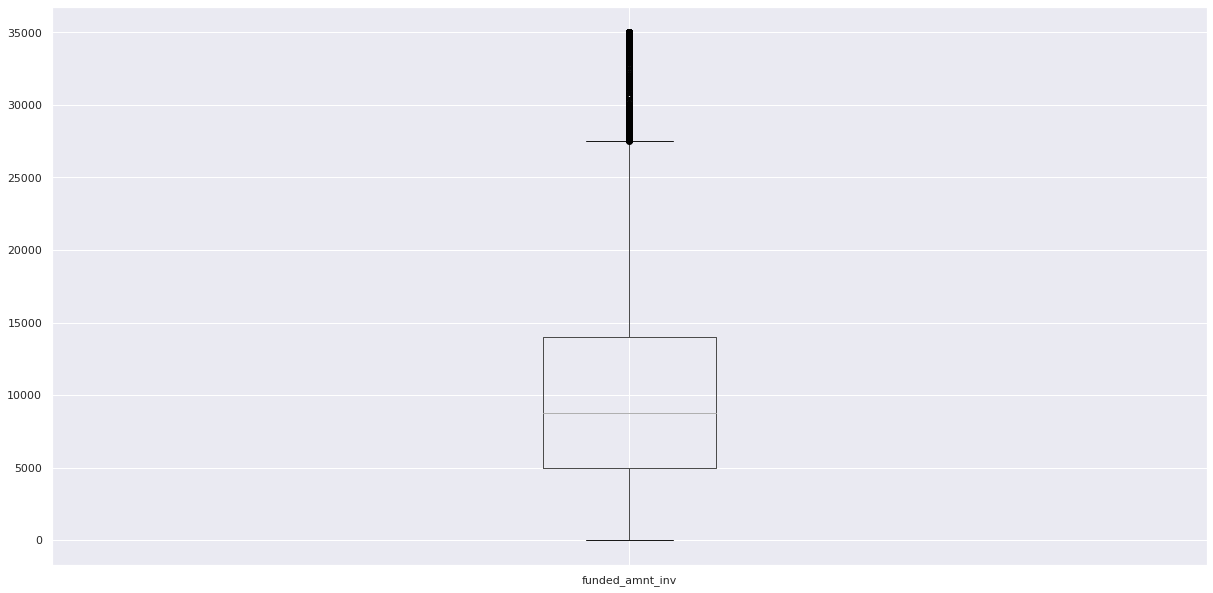

In [136]:
df5.boxplot(column='funded_amnt_inv')       #Box Plot of Investment of Funded amount

The box plot also hints the population of funded amount is higher within Rs.15,000

In [24]:
import seaborn as sns
sns.set(style="darkgrid")

<AxesSubplot:>

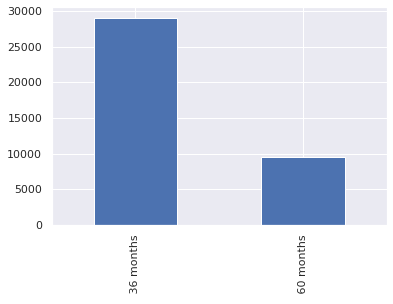

In [25]:
df5['term'].value_counts().plot(kind="bar")    #Count Plot of Term of Loan

<AxesSubplot:>

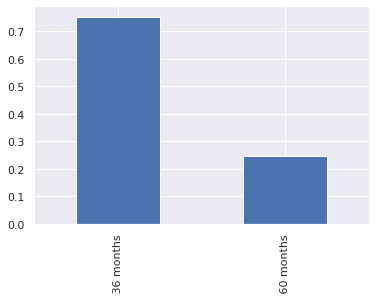

In [26]:
df5['term'].value_counts(normalize = True).plot(kind="bar")    #Count % Plot of Term of Loan

The highest population of term of loan invested is 36 months

In [27]:
df5.to_csv('tmp.csv')           #Reloading the csv file for getting the serial index
df5 = pd.read_csv('tmp.csv')
df5.head()   

Unnamed: 0  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           0       5000         5000           4975.0   36 months   10.65%   
1           1       2500         2500           2500.0   60 months   15.27%   
2           2       2400         2400           2400.0   36 months   15.96%   
3           3      10000        10000          10000.0   36 months   13.49%   
4           5       5000         5000           5000.0   36 months    7.90%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
4     Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

   mths_since_last_delinq  pub_rec_bankruptcies  
0                     NaN                   0.0  
1                     NaN                   0.0  
2                     NaN                   0.0  
3                    35.0                   0.0  
4                     NaN                   0.0

In [28]:
df6 = df5.drop(['Unnamed: 0'], axis = 1)         #Removing unwanted column
df6

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           5000         5000           5000.0   36 months    7.90%   
...          ...          ...              ...         ...      ...   
38572       2500         2500           1075.0   36 months    8.07%   
38573       8500         8500            875.0   36 months   10.28%   
38574       5000         5000           1325.0   36 months    8.07%   
38575       5000         5000            650.0   36 months    7.43%   
38576       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+ years           RENT     24000.0   
1            59.83     C        C4   < 1 year           RENT     30000.0   
2            84.33     C        C5  10+ years           RENT     12252.0   
3           339.31     C        C1  10+ years           RENT     49200.0   
4           156.46     A        A4    3 years           RENT     36000.0   
...            ...   ...       ...        ...            ...         ...   
38572        78.42     A        A4    4 years       MORTGAGE    110000.0   
38573       275.38     C        C1    3 years           RENT     18000.0   
38574       156.84     A        A4   < 1 year       MORTGAGE    100000.0   
38575       155.38     A        A2   < 1 year       MORTGAGE    200000.0   
38576       255.43     E        E2   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status             purpose addr_state  \
0                Verified  Dec-11   Fully Paid         credit_card         AZ   
1         Source Verified  Dec-11  Charged Off                 car         GA   
2            Not Verified  Dec-11   Fully Paid      small_business         IL   
3         Source Verified  Dec-11   Fully Paid               other         CA   
4         Source Verified  Dec-11   Fully Paid             wedding         AZ   
...                   ...     ...          ...                 ...        ...   
38572        Not Verified  Jul-07   Fully Paid    home_improvement         CO   
38573        Not Verified  Jul-07   Fully Paid         credit_card         NC   
38574        Not Verified  Jul-07   Fully Paid  debt_consolidation         MA   
38575        Not Verified  Jul-07   Fully Paid               other         MD   
38576        Not Verified  Jun-07   Fully Paid  debt_consolidation         MA   

         dti  mths_since_last_delinq  pub_rec_bankruptcies  
0      27.65                     NaN                   0.0  
1       1.00                     NaN                   0.0  
2       8.72                     NaN                   0.0  
3      20.00                    35.0                   0.0  
4      11.20                     NaN                   0.0  
...      ...                     ...                   ...  
38572  11.33                     0.0                   NaN  
38573   6.40                     5.0                   NaN  
38574   2.30                     0.0                   NaN  
38575   3.72                     0.0                   NaN  
38576  14.29                    11.0                   NaN  

[38577 rows x 19 columns]

In [29]:
df6['int_rate_new'] = '' # Creating a new column for interest rate to remove the % sign in the string and converting to float so that becomes compatible for analysis

In [30]:
for i in range(len(df6)):                              #Removing the '%' sign and adding the data to new column
    if df6.loc[i,'int_rate'] != '':
        df6.loc[i,'int_rate_new'] = float(df6.loc[i,'int_rate'].rstrip('%'))

In [31]:
df6.info()         # Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  issue_d                 38577 non-null  object 
 13  loan_status             38577 non-null  object 
 14  purpose                 38577 non-null

In [138]:
df6.describe()               #Information about quantitative variables in the dataframe such as count,mean,quantile

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123    322.466318   
std     7348.441646   7090.306027      7022.720644    208.639215   
min      500.000000    500.000000         0.000000     15.690000   
25%     5300.000000   5200.000000      5000.000000    165.740000   
50%     9600.000000   9550.000000      8733.440000    277.860000   
75%    15000.000000  15000.000000     14000.000000    425.550000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti  mths_since_last_delinq  \
count  3.857700e+04  38577.000000            13672.000000   
mean   6.877797e+04     13.272727               35.882534   
std    6.421868e+04      6.673044               22.028093   
min    4.000000e+03      0.000000                0.000000   
25%    4.000000e+04      8.130000               18.000000   
50%    5.886800e+04     13.370000               34.000000   
75%    8.200000e+04     18.560000               52.000000   
max    6.000000e+06     29.990000              120.000000   

       pub_rec_bankruptcies  int_rate_new  
count          37880.000000  38577.000000  
mean               0.043479     11.932219  
std                0.204583      3.691327  
min                0.000000      5.420000  
25%                0.000000      8.940000  
50%                0.000000     11.710000  
75%                0.000000     14.380000  
max                2.000000     24.400000

In [33]:
df6['int_rate_new'] = pd.to_numeric(df6['int_rate_new'])     #Converting the new column type to numeric data

array([[<AxesSubplot:title={'center':'int_rate_new'}>]], dtype=object)

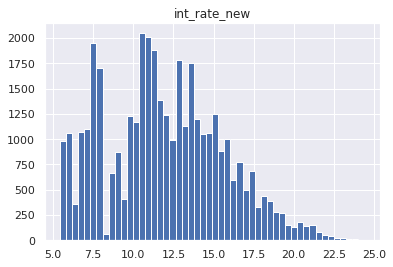

In [34]:
df6.hist(column='int_rate_new',bins=50)         #Histogram plot of Interest Rates

<AxesSubplot:ylabel='Density'>

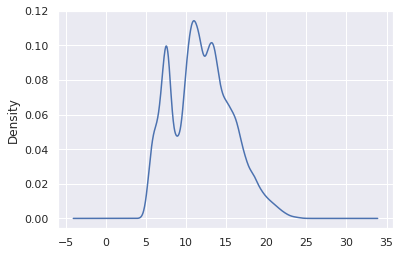

In [35]:
df6['int_rate_new'].plot.density()           #PDF plot of Interest Rate

The maximum loan applicants are charged interest within 15%

<AxesSubplot:>

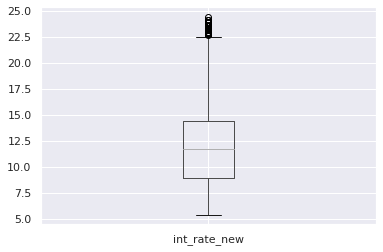

In [36]:
df6.boxplot(column='int_rate_new')              #Box Plot of Interest Rate

The maximum loan applicant's interest charged is populated within 15%

array([[<AxesSubplot:title={'center':'installment'}>]], dtype=object)

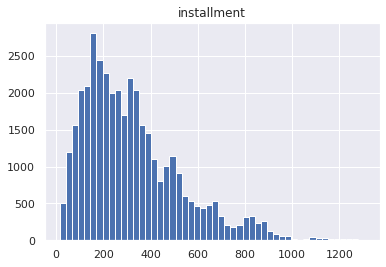

In [37]:
df6.hist(column='installment',bins=50)            #Histogram Plot of Installment

<AxesSubplot:ylabel='Density'>

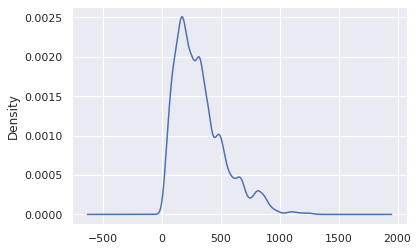

In [38]:
df6['installment'].plot.density()                 #PDF plot of Installment

The maximum applicants are paying installments within Rs.500

<AxesSubplot:>

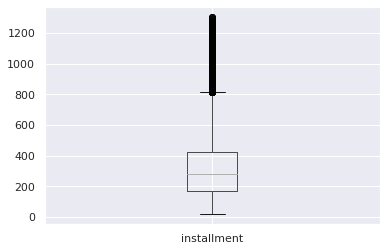

In [39]:
df6.boxplot(column='installment')                #Box plot of Installment

The maximum applicants are paying installments within Rs.500

<AxesSubplot:>

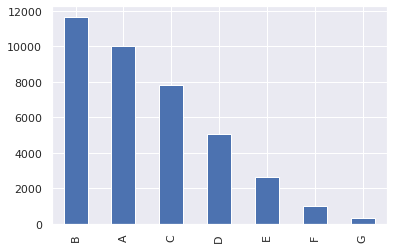

In [40]:
df6['grade'].value_counts().plot(kind="bar")          #Count plot of Grade of working employees of loan stakeholders

<AxesSubplot:>

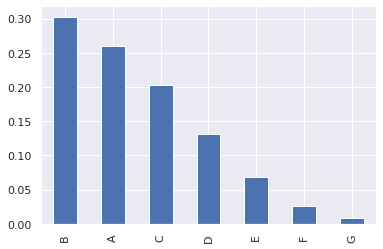

In [41]:
df6['grade'].value_counts(normalize = True).plot(kind="bar")          #Count plot of Grade of working employees of loan stakeholders

The loan applicants of employment level grade B has the maximum loan followed by A,C

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

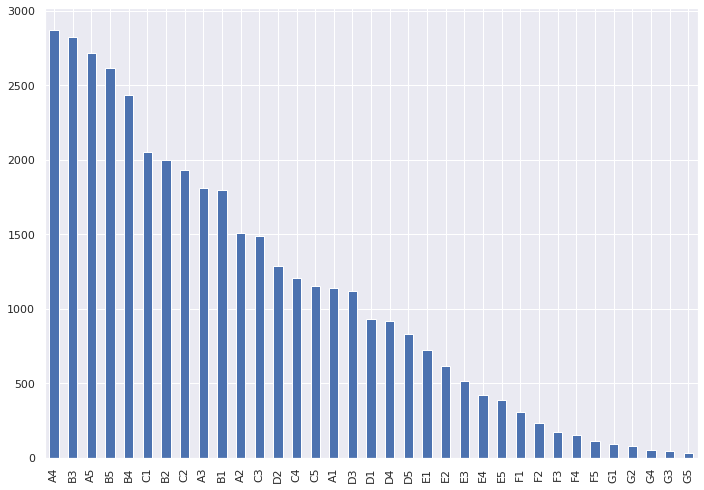

In [43]:
df6['sub_grade'].value_counts().plot(kind="bar")            #Count plot of Sub-Grade of working employees of loan stakeholders

<AxesSubplot:>

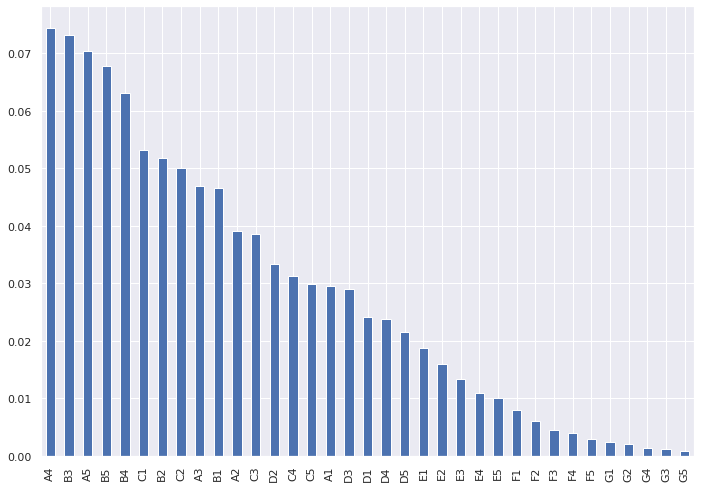

In [44]:
df6['sub_grade'].value_counts(normalize = True).plot(kind="bar")            #Count plot of Sub-Grade of working employees of loan stakeholders

The loan applicants of employment level of sub-grade A4 has the maximum loan followed by B3,A5,...

<AxesSubplot:>

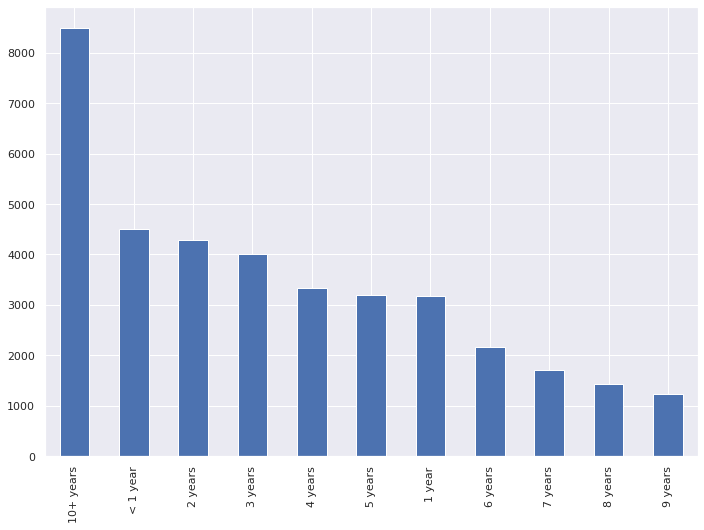

In [45]:
df6['emp_length'].value_counts().plot(kind="bar")          #Count Plot Employment term of loan stakeholders

<AxesSubplot:>

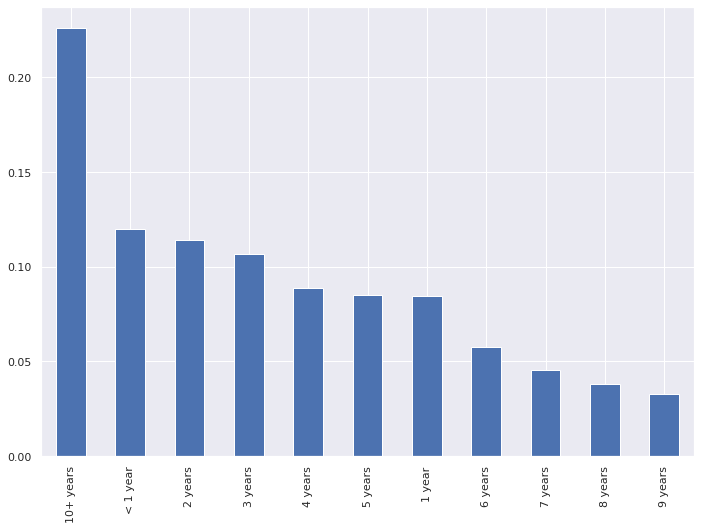

In [46]:
df6['emp_length'].value_counts(normalize = True).plot(kind="bar")          #Count Plot Employment term of loan stakeholders

The loan applicants with employee term of 10+ years have the maximum loan followed by <1 year

<AxesSubplot:>

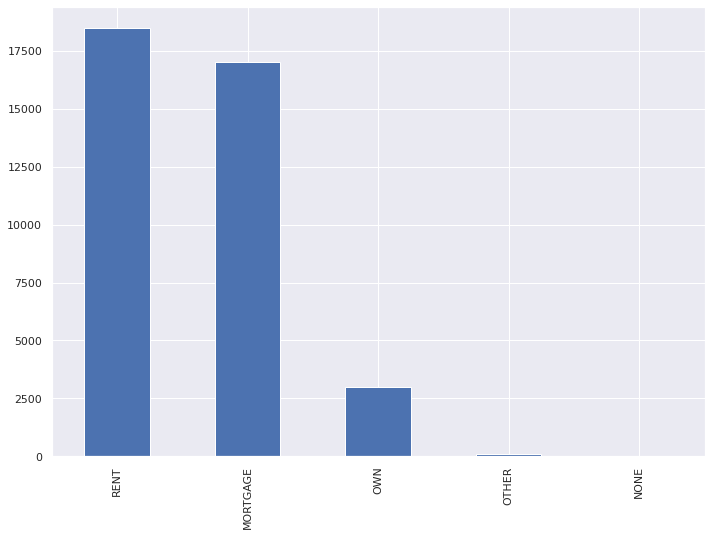

In [47]:
df6['home_ownership'].value_counts().plot(kind="bar")             #Count Plot Home ownership of loan stakeholders

<AxesSubplot:>

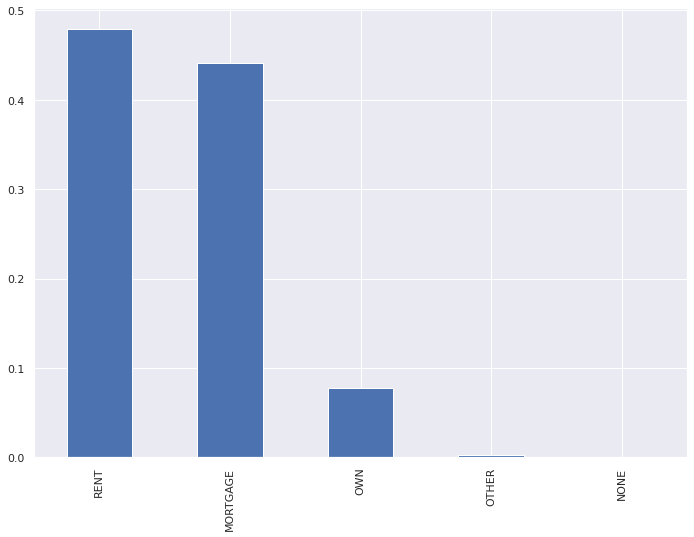

In [48]:
df6['home_ownership'].value_counts(normalize = True).plot(kind="bar")             #Count % Plot Home ownership of loan stakeholders

The loan applicants with house ownership of rent have the maximum loan applicants followed by mortgage category

array([[<AxesSubplot:title={'center':'annual_inc'}>]], dtype=object)

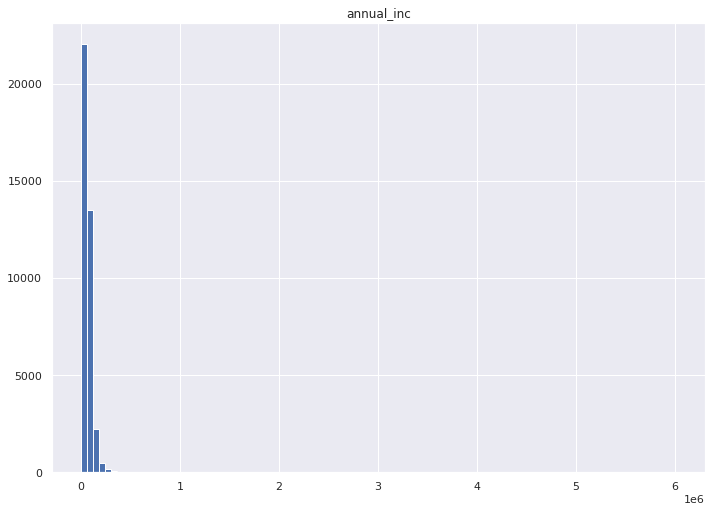

In [49]:
df6.hist(column='annual_inc',bins=100)            #Histogram Plot of Installment

<AxesSubplot:ylabel='Density'>

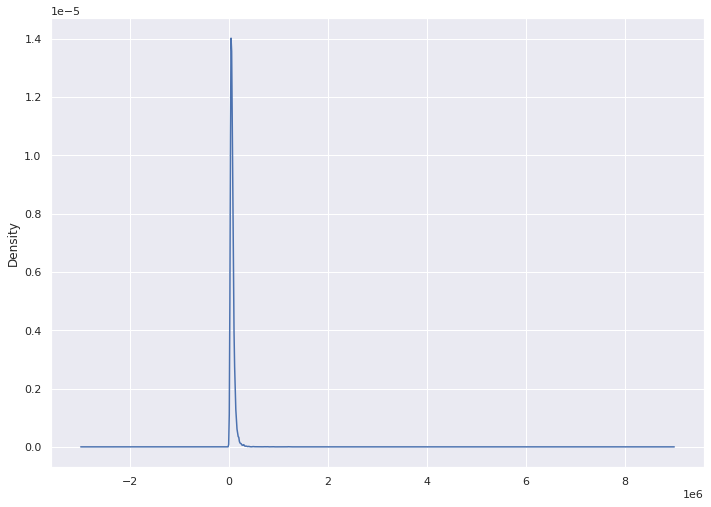

In [50]:
df6['annual_inc'].plot.density()                 #PDF plot of Installment

<AxesSubplot:>

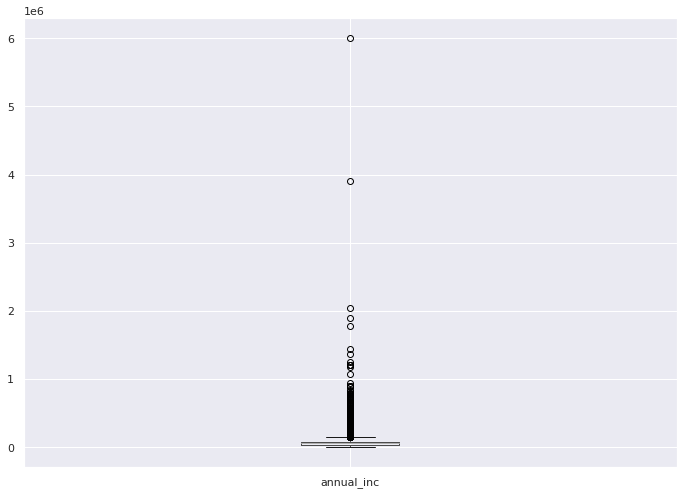

In [51]:
df6.boxplot(column='annual_inc')                #Box plot of Installment

In [52]:
df6.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123    322.466318   
std     7348.441646   7090.306027      7022.720644    208.639215   
min      500.000000    500.000000         0.000000     15.690000   
25%     5300.000000   5200.000000      5000.000000    165.740000   
50%     9600.000000   9550.000000      8733.440000    277.860000   
75%    15000.000000  15000.000000     14000.000000    425.550000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti  mths_since_last_delinq  \
count  3.857700e+04  38577.000000            13672.000000   
mean   6.877797e+04     13.272727               35.882534   
std    6.421868e+04      6.673044               22.028093   
min    4.000000e+03      0.000000                0.000000   
25%    4.000000e+04      8.130000               18.000000   
50%    5.886800e+04     13.370000               34.000000   
75%    8.200000e+04     18.560000               52.000000   
max    6.000000e+06     29.990000              120.000000   

       pub_rec_bankruptcies  int_rate_new  
count          37880.000000  38577.000000  
mean               0.043479     11.932219  
std                0.204583      3.691327  
min                0.000000      5.420000  
25%                0.000000      8.940000  
50%                0.000000     11.710000  
75%                0.000000     14.380000  
max                2.000000     24.400000

The maximum loak stakeholders have the annual income within Rs.82000 

<AxesSubplot:>

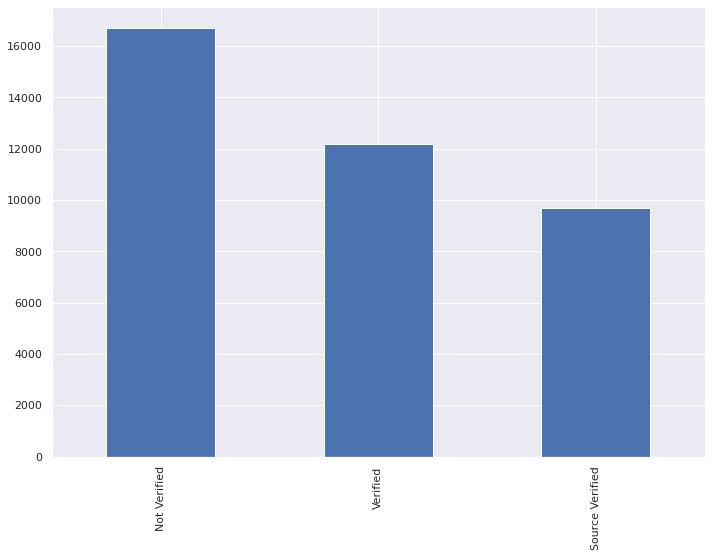

In [53]:
df6['verification_status'].value_counts().plot(kind="bar")    #Count Plot Employment term of loan stakeholders

<AxesSubplot:>

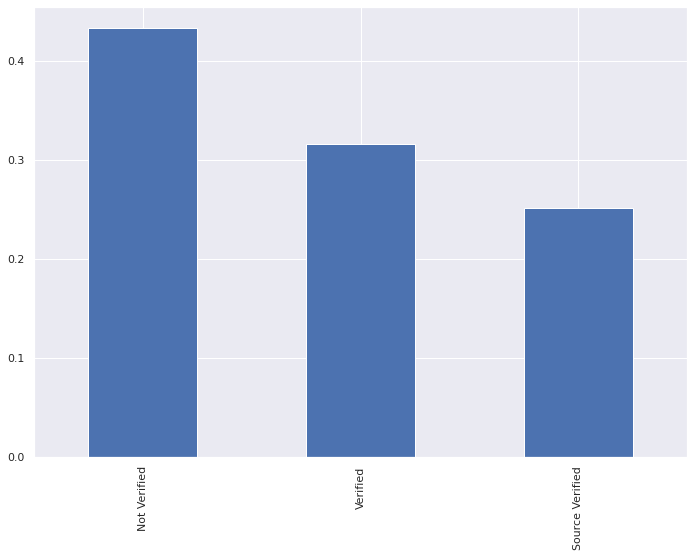

In [54]:
df6['verification_status'].value_counts(normalize = True).plot(kind="bar")    #Count % Plot Employment term of loan stakeholders

The loan applicants with income verification of Not-verified has the maximum loan applicants

In [55]:
sns.set(rc={'figure.figsize':(20.7,10.27)})

<AxesSubplot:>

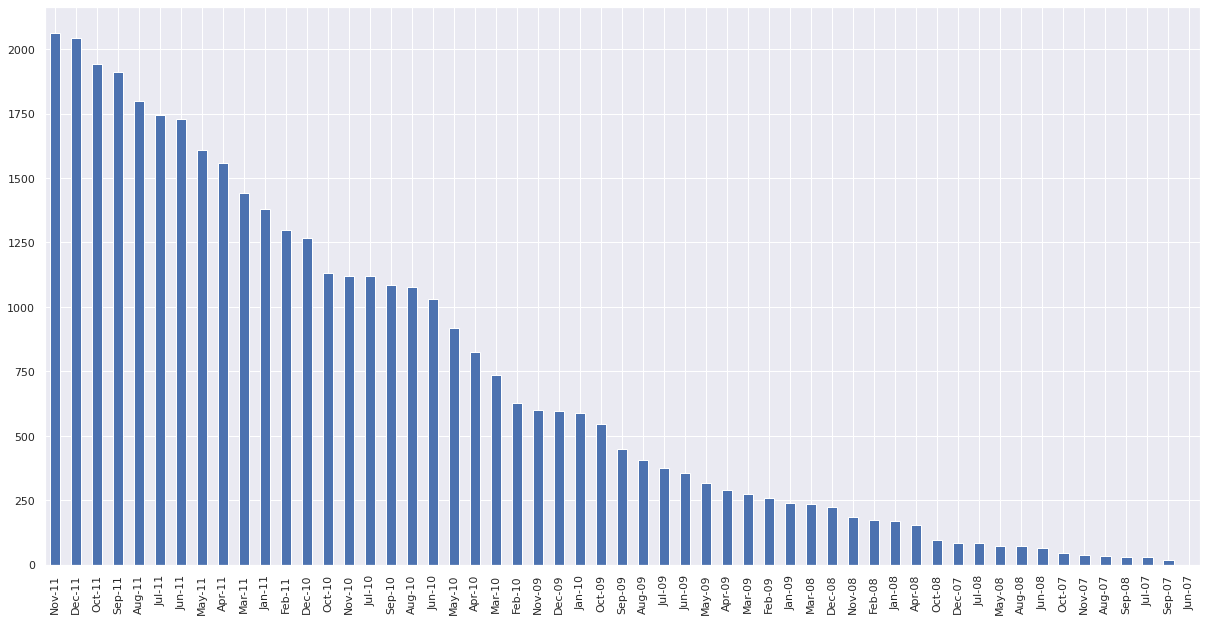

In [56]:
df6['issue_d'].value_counts().plot(kind="bar")             #Count Plot issue date of loan for loan stakeholders

<AxesSubplot:>

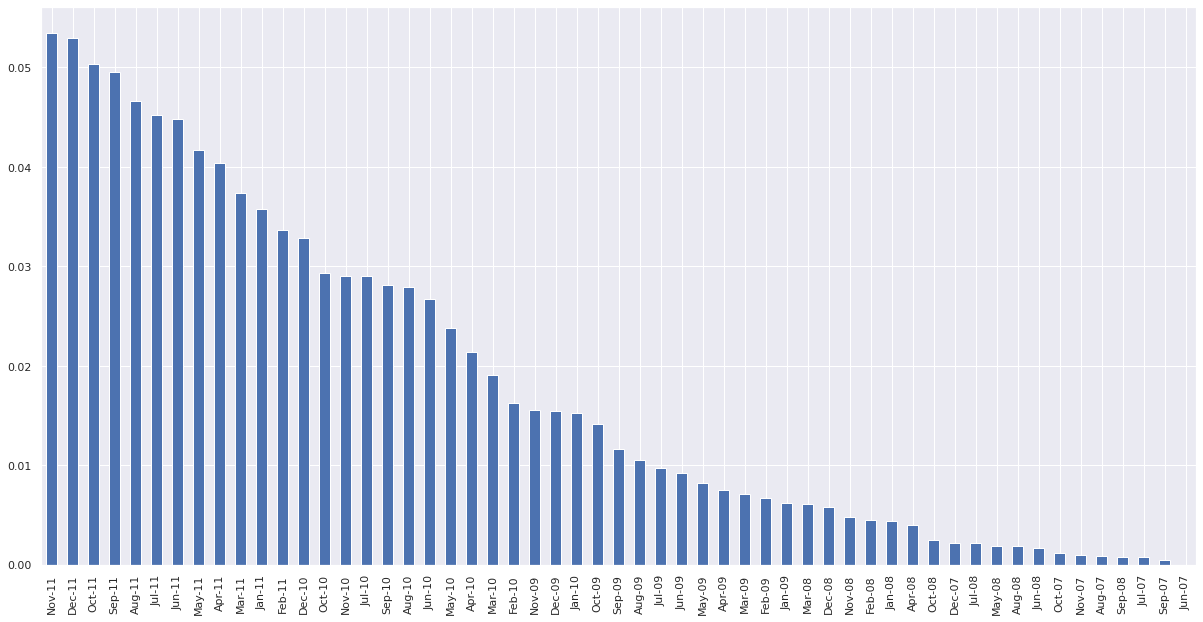

In [57]:
df6['issue_d'].value_counts(normalize = True).plot(kind="bar")             #Count % Plot issue date of loan for loan stakeholders

The highest number loan to loan applicants was issued on Nov-11 followed by Dec-11 

<AxesSubplot:>

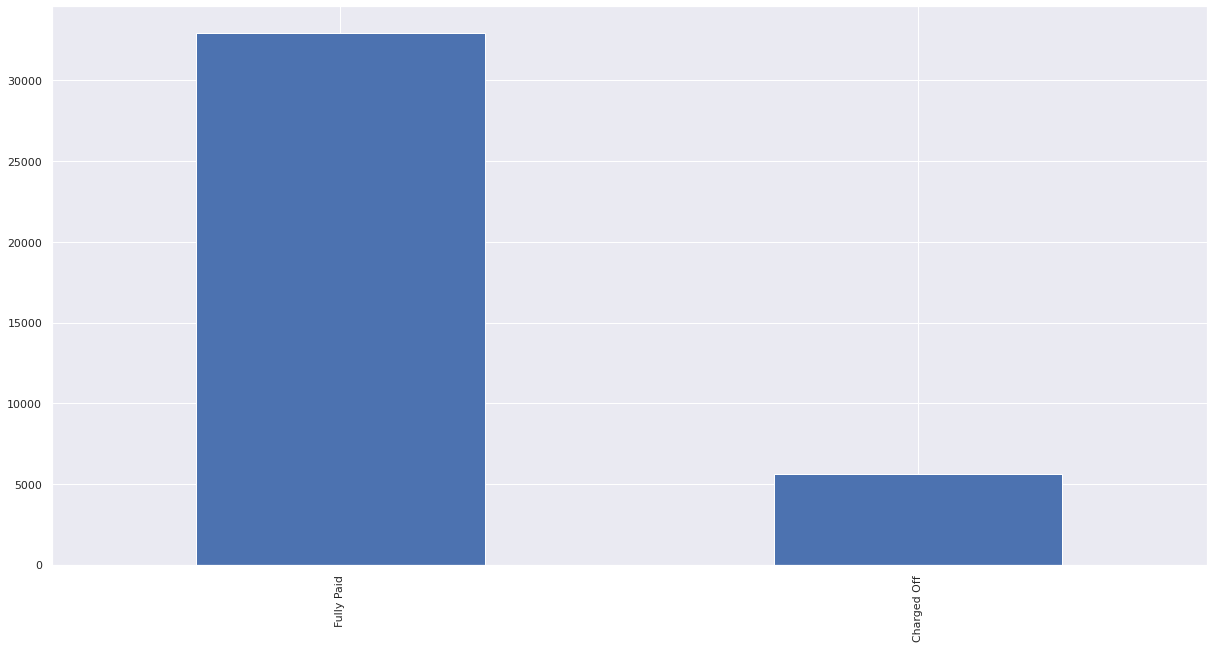

In [58]:
df6['loan_status'].value_counts().plot(kind="bar")  

<AxesSubplot:>

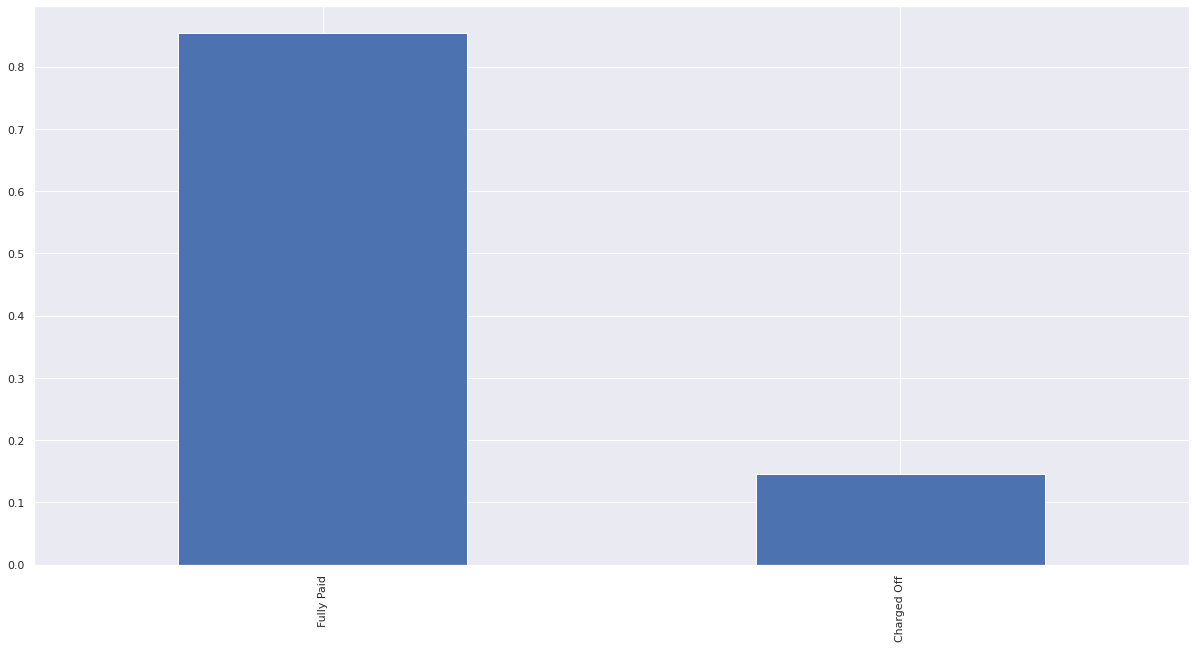

In [59]:
df6['loan_status'].value_counts(normalize=True).plot(kind="bar") 

Fully paid loan applicants are in more numbers then charged off(default) category

<AxesSubplot:>

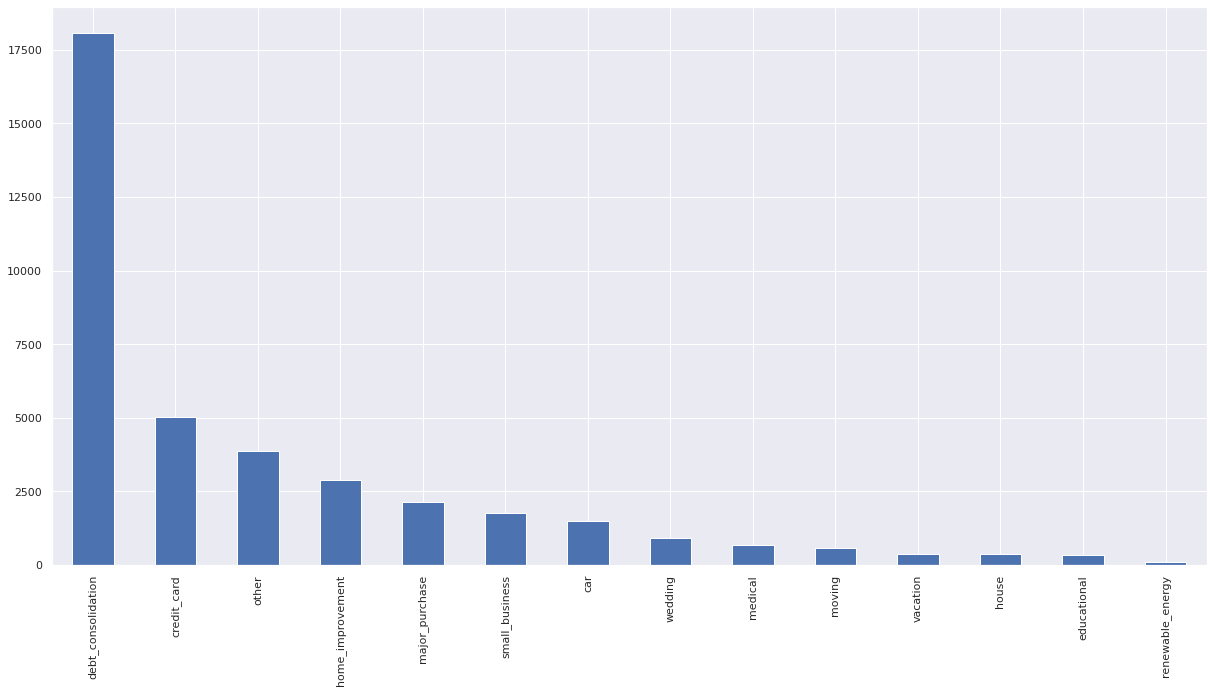

In [60]:
df6['purpose'].value_counts().plot(kind="bar") 

<AxesSubplot:>

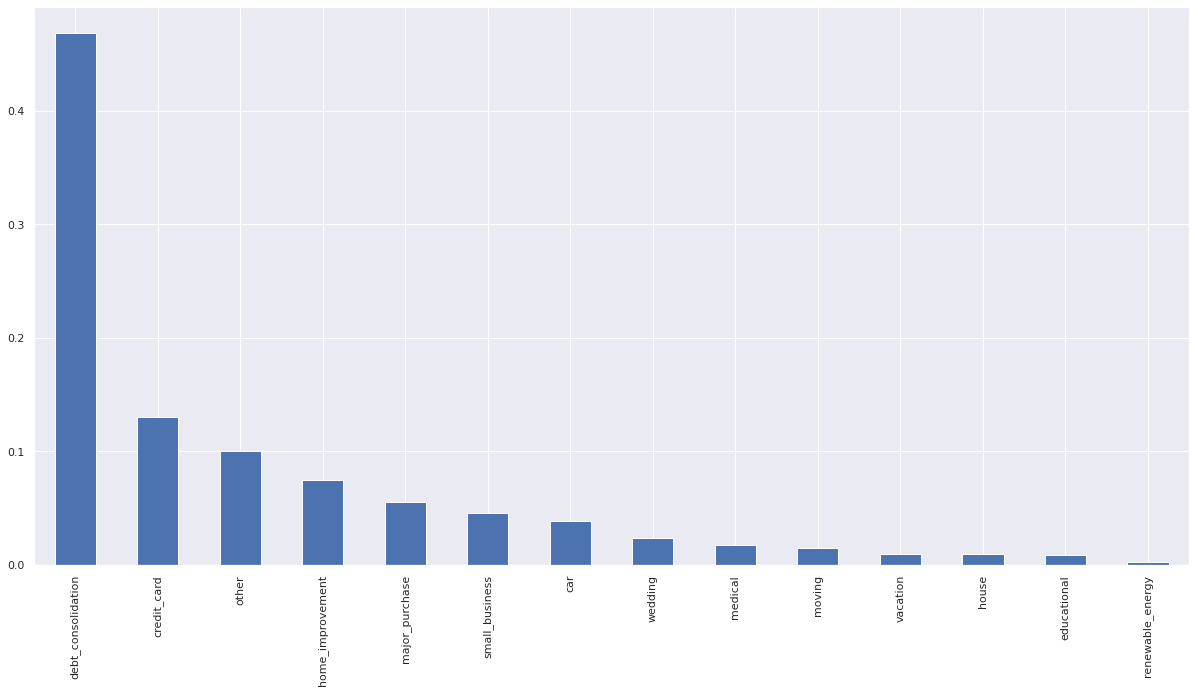

In [61]:
df6['purpose'].value_counts(normalize=True).plot(kind="bar") 

The highest number loan to loan applicants was issued for purpose on debt consolidation followed by credit card

<AxesSubplot:>

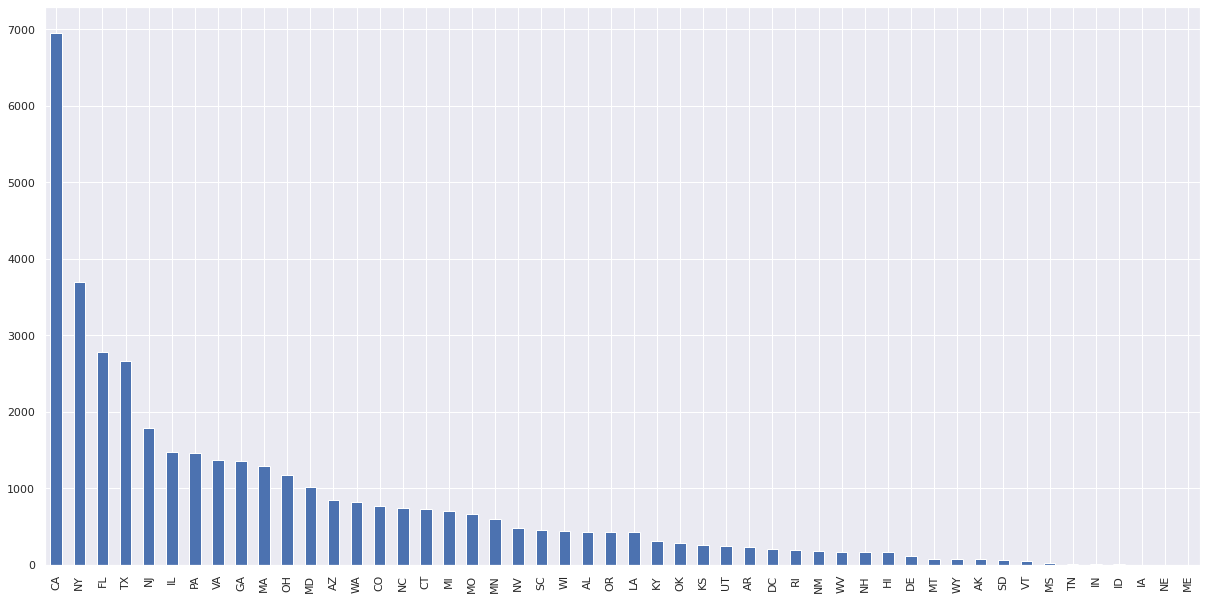

In [62]:
df6['addr_state'].value_counts().plot(kind="bar") 

<AxesSubplot:>

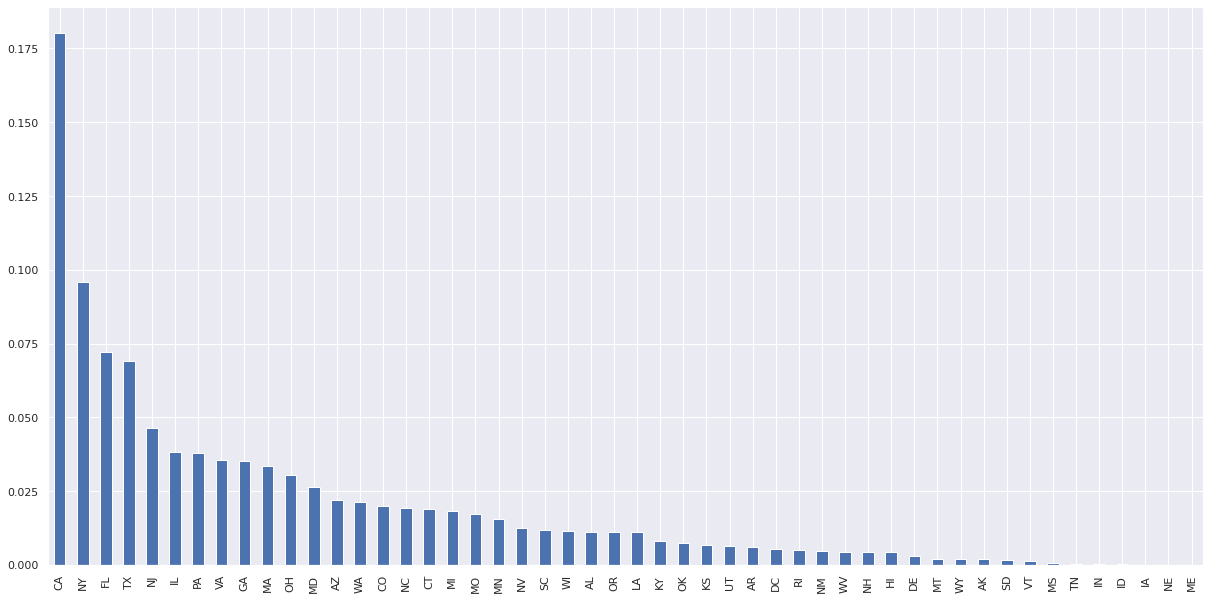

In [63]:
df6['addr_state'].value_counts(normalize = True).plot(kind="bar") 

The highest number loan to loan applicants was issued to applicants residing in CA state followed by NY state

array([[<AxesSubplot:title={'center':'dti'}>]], dtype=object)

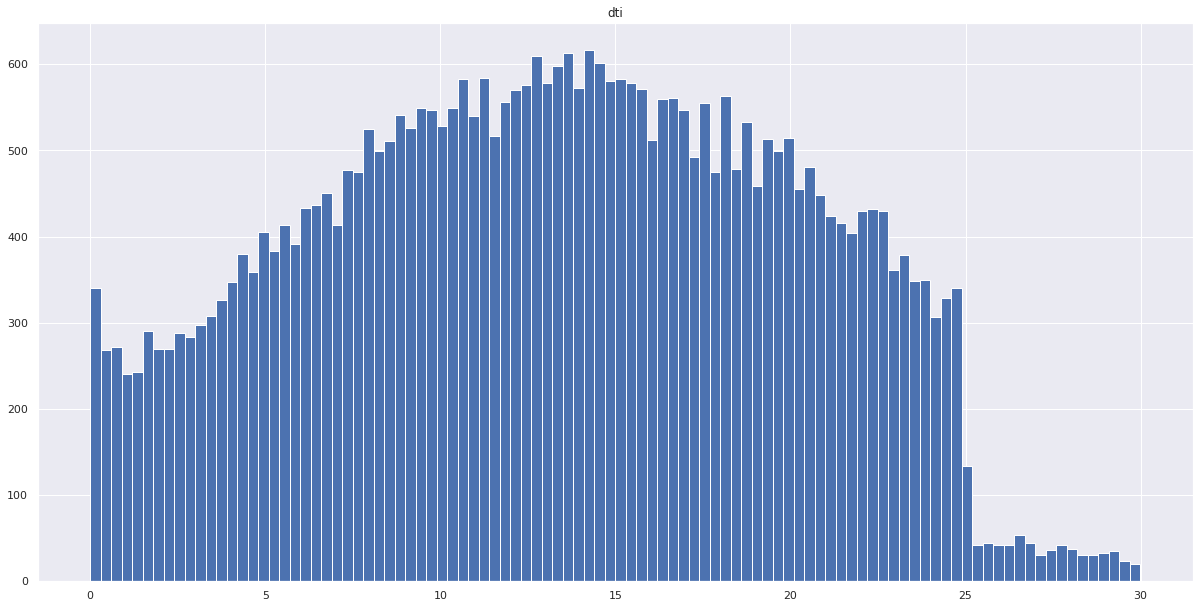

In [64]:
df6.hist(column='dti',bins=100)            #Histogram Plot of dti

<AxesSubplot:ylabel='Density'>

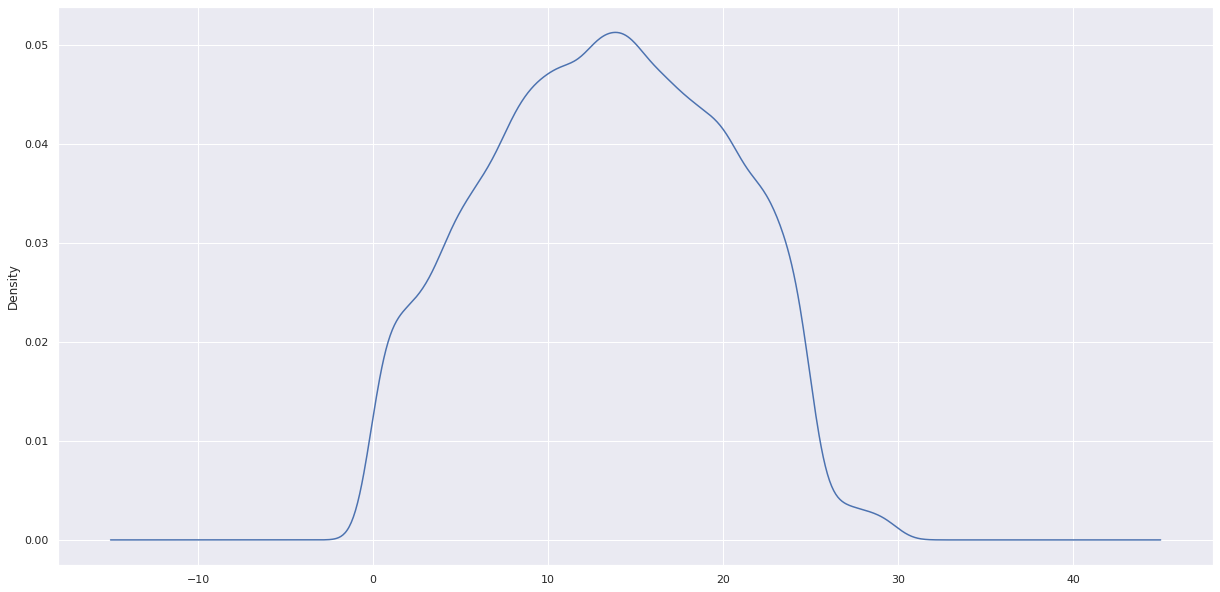

In [65]:
df6['dti'].plot.density() 

<AxesSubplot:>

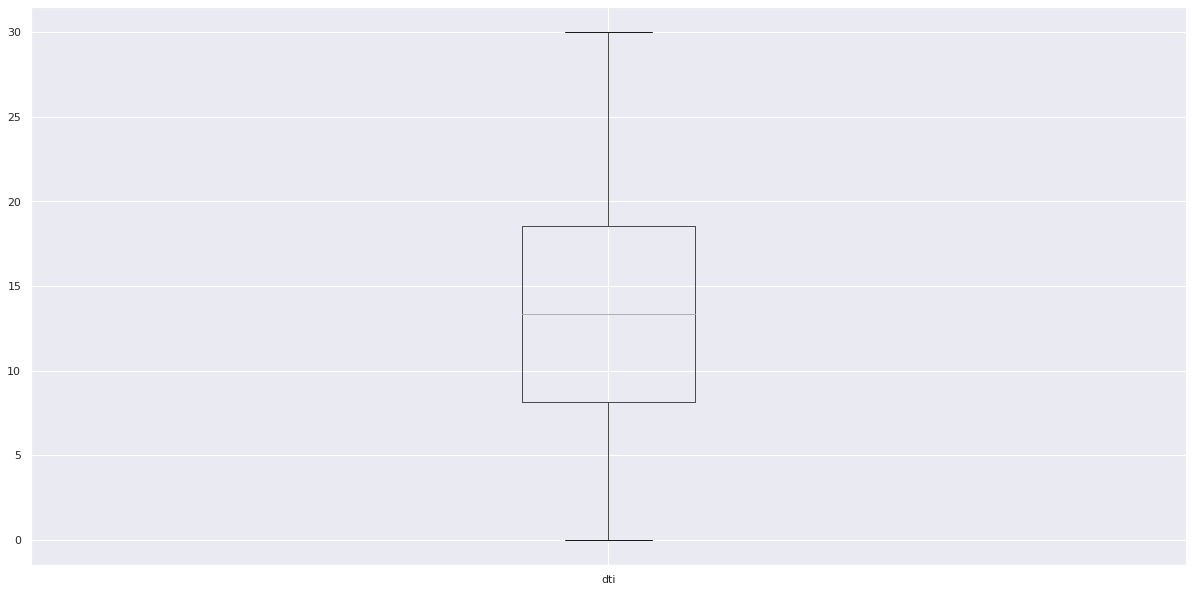

In [66]:
df6.boxplot(column='dti')   #Box Plot of loan amount

In [144]:
df6.describe()   #Describes the data

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123    322.466318   
std     7348.441646   7090.306027      7022.720644    208.639215   
min      500.000000    500.000000         0.000000     15.690000   
25%     5300.000000   5200.000000      5000.000000    165.740000   
50%     9600.000000   9550.000000      8733.440000    277.860000   
75%    15000.000000  15000.000000     14000.000000    425.550000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti  mths_since_last_delinq  \
count  3.857700e+04  38577.000000            13672.000000   
mean   6.877797e+04     13.272727               35.882534   
std    6.421868e+04      6.673044               22.028093   
min    4.000000e+03      0.000000                0.000000   
25%    4.000000e+04      8.130000               18.000000   
50%    5.886800e+04     13.370000               34.000000   
75%    8.200000e+04     18.560000               52.000000   
max    6.000000e+06     29.990000              120.000000   

       pub_rec_bankruptcies  int_rate_new  
count          37880.000000  38577.000000  
mean               0.043479     11.932219  
std                0.204583      3.691327  
min                0.000000      5.420000  
25%                0.000000      8.940000  
50%                0.000000     11.710000  
75%                0.000000     14.380000  
max                2.000000     24.400000

The maximum number of loan applicants are in the debt to income (dti) ratio of 8.13 to 18.56

array([[<AxesSubplot:title={'center':'mths_since_last_delinq'}>]],
      dtype=object)

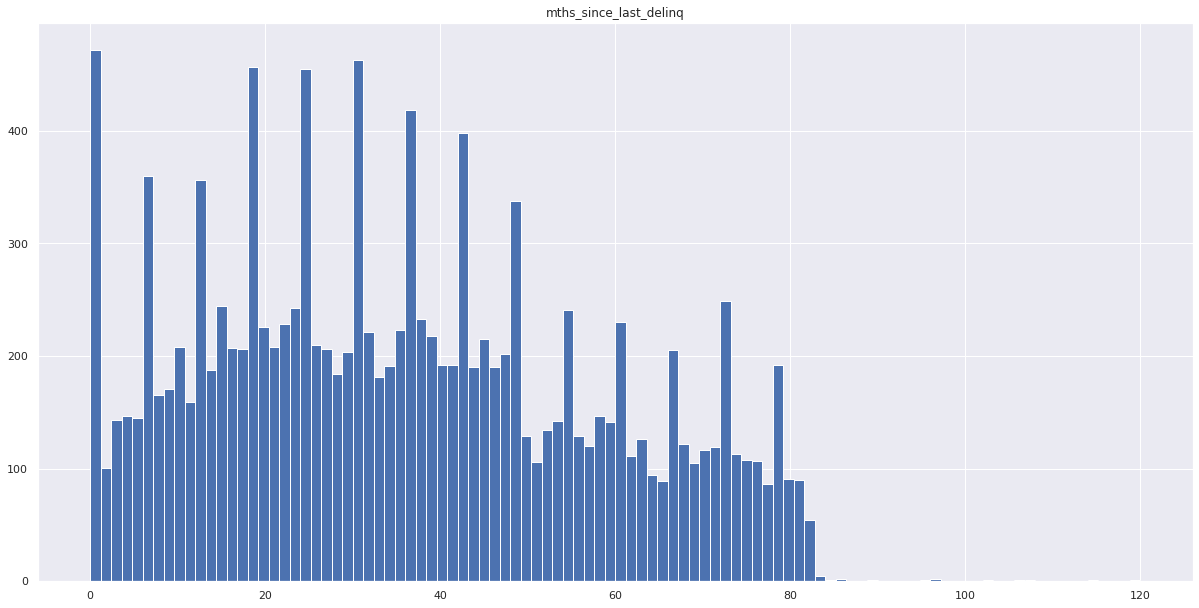

In [67]:
df6.hist(column='mths_since_last_delinq',bins=100)            #Histogram Plot of dti

<AxesSubplot:ylabel='Density'>

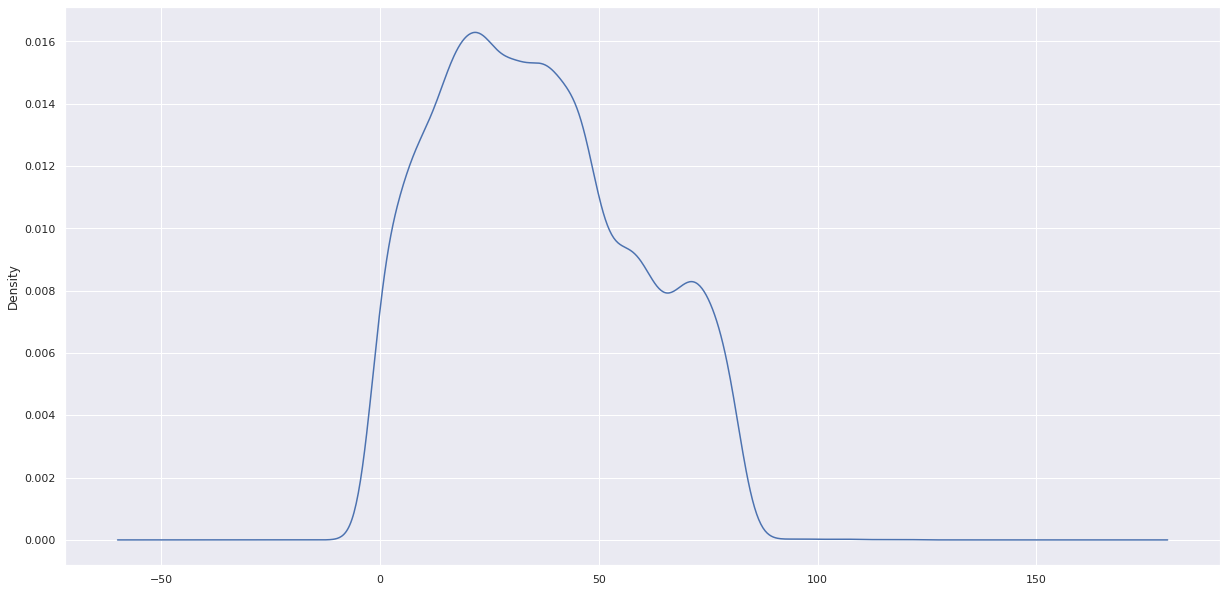

In [145]:
df6['mths_since_last_delinq'].plot.density() 

<AxesSubplot:>

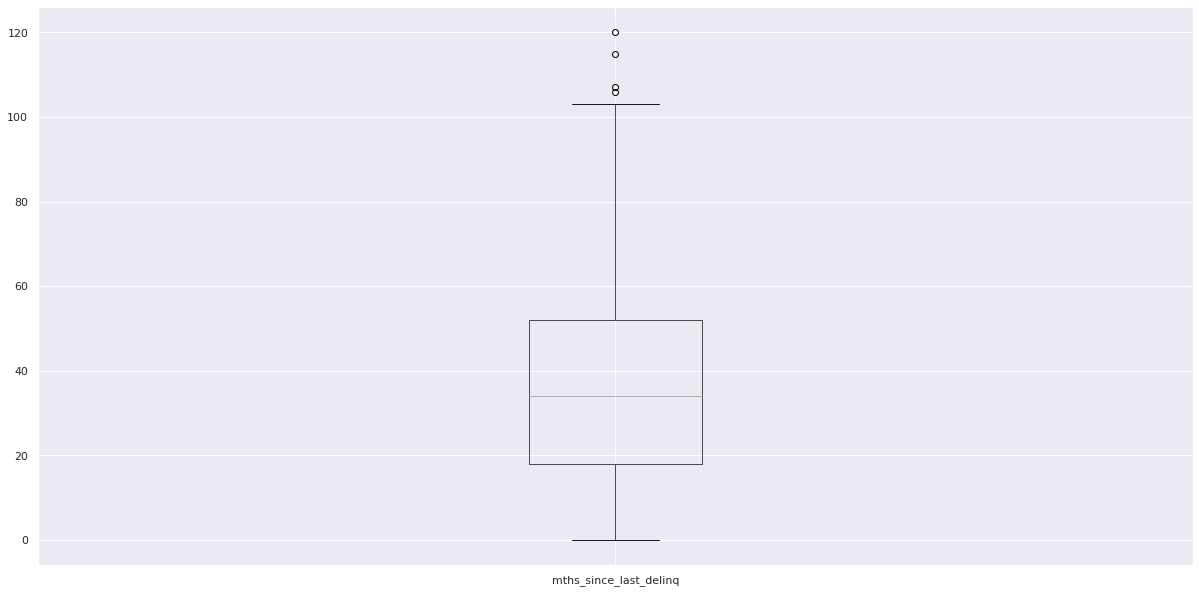

In [68]:
df6.boxplot(column='mths_since_last_delinq')   #Box Plot of loan amount

The maximum number of loan applicants having records since last delinquent are with in 52 months

<AxesSubplot:>

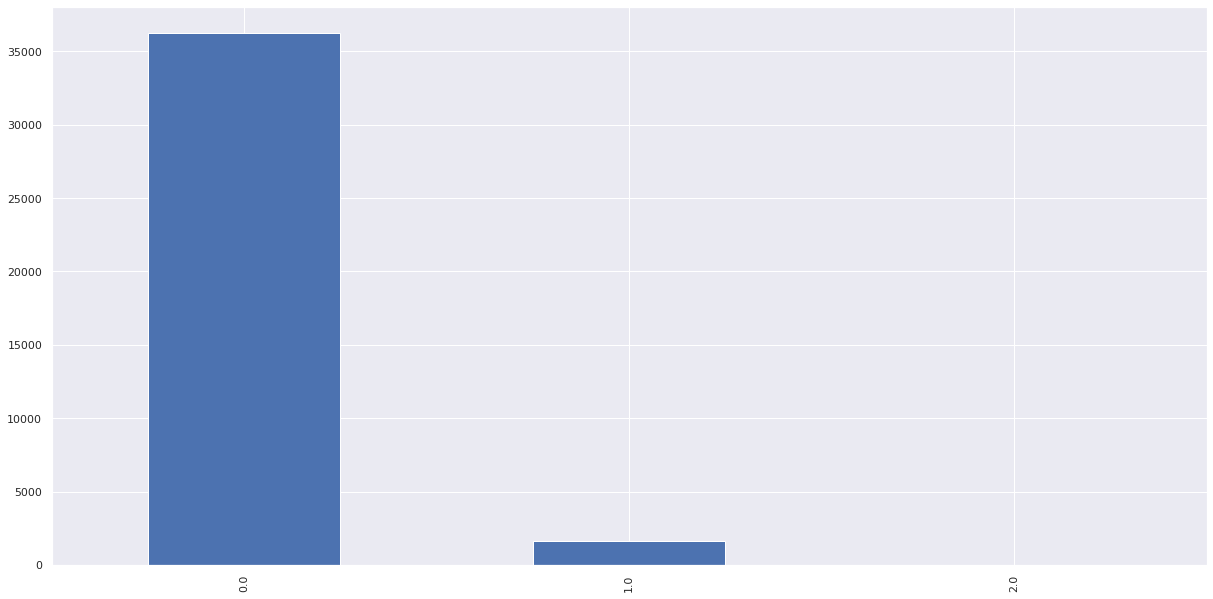

In [69]:
df6['pub_rec_bankruptcies'].value_counts().plot(kind="bar") 

<AxesSubplot:>

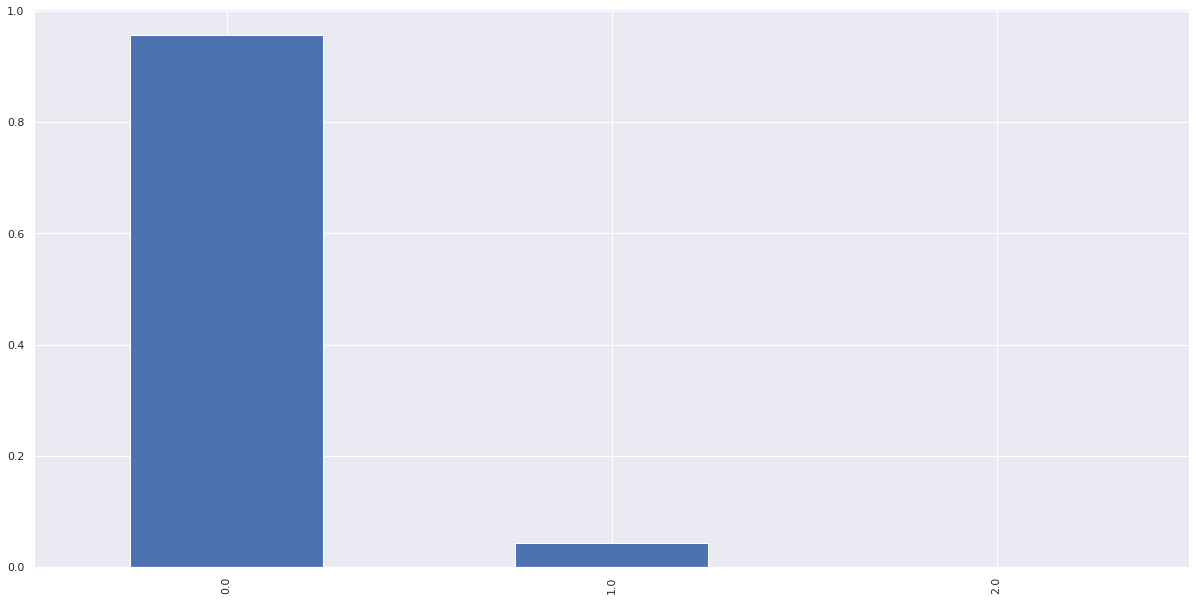

In [70]:
df6['pub_rec_bankruptcies'].value_counts(normalize = True).plot(kind="bar") 

The maximum number of loan applicants have 0 record of bankruptcies

<AxesSubplot:>

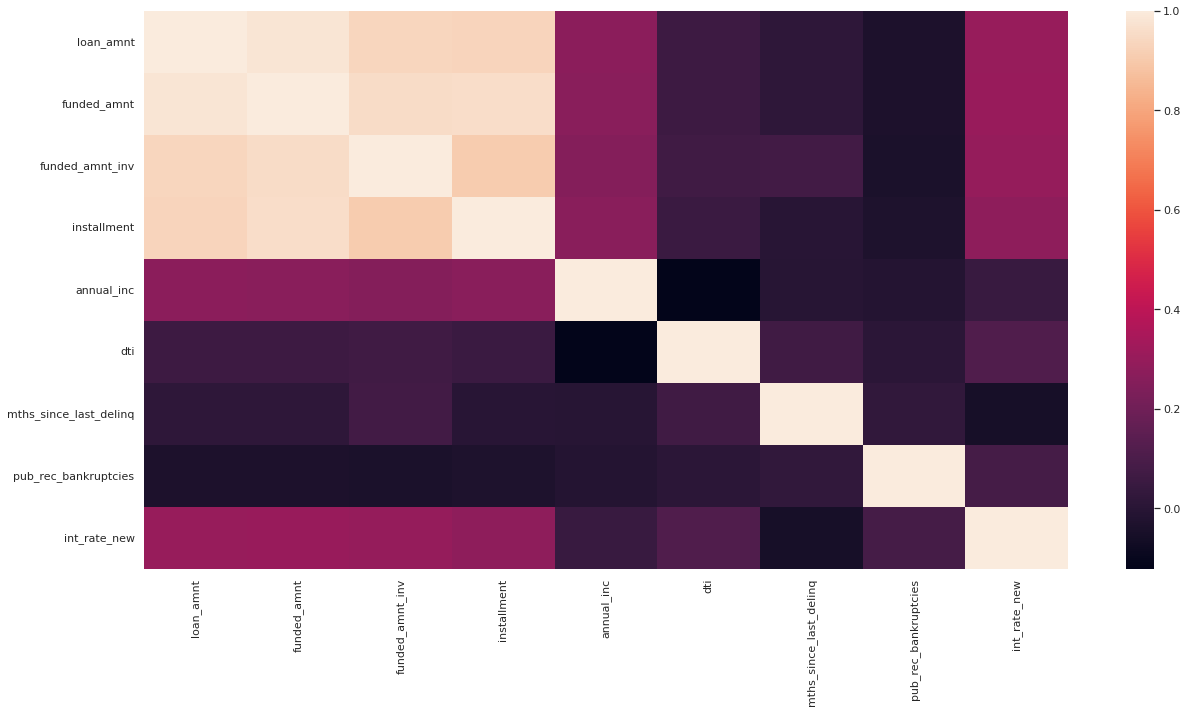

In [72]:
sns.heatmap(df6.corr())  #Correlation map

In [73]:
import plotly.express as px
fig = px.imshow(df6.corr())
fig.show()                           #Interactive Correlation map

/home/sridhatta/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/sridhatta/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Loan Amount,Funded Amount, Funded amount invested,installment are highly correlated amongst each other

2022-07-06 17:24:23,904 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
/home/sridhatta/anaconda3/lib/python3.7/site-packages/dython/nominal.py:735: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

2022-07-06 17:24:24,093 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


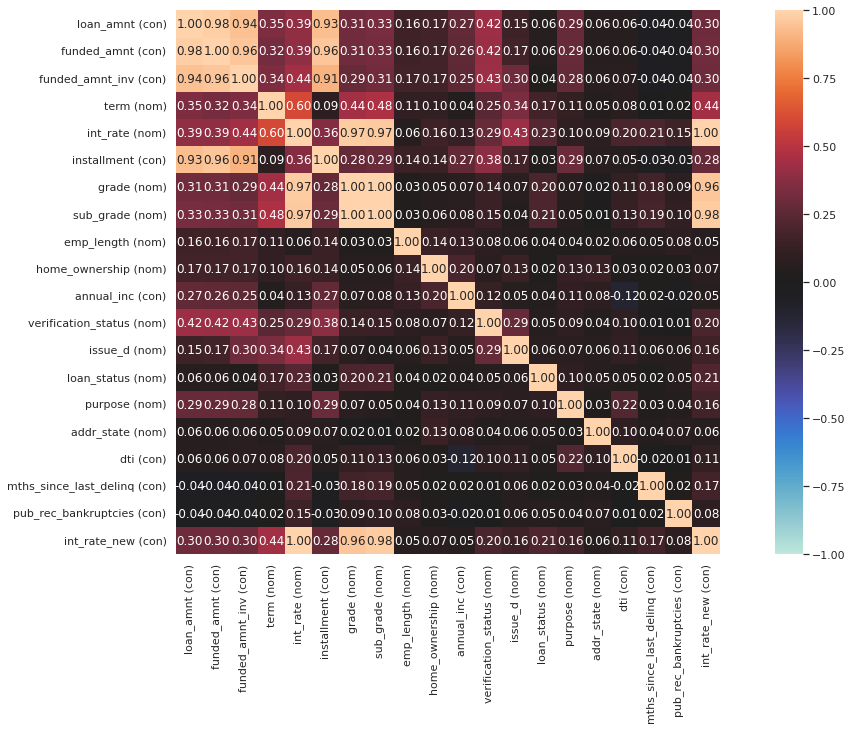

In [79]:
from dython import nominal     #Importing the module
nominal.associations(df6,figsize=(20,10),mark_columns=True);           # Overall correlation map

The correlation map tells the overall correlation of variables it is quite high in amount section(loan,funded amount and investment of funded amount) while grade has high correlation with sub_grade and grade and sub-grade has high correlation with interest rate and the loan_status has the highest correlation with interest rate,sub_grade
Note: for interest rate variable: int_rate_new is considered

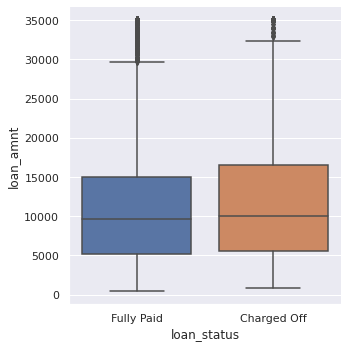

In [80]:
sns.catplot(x="loan_status", y="loan_amnt", kind="box", data=df6) # Box Plot of loan amount and loan status

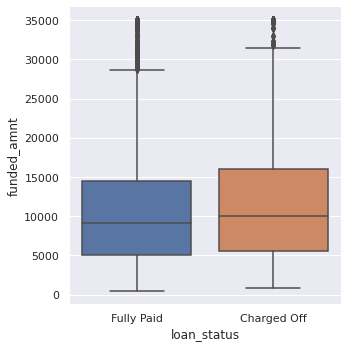

In [81]:
sns.catplot(x="loan_status", y="funded_amnt", kind="box", data=df6) # Box Plot of loan funded amount and loan status

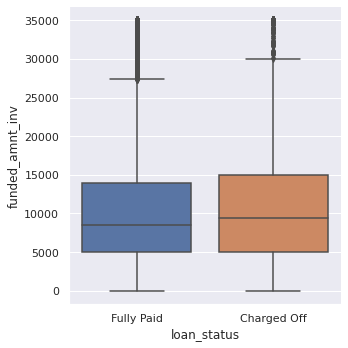

In [82]:
sns.catplot(x="loan_status", y="funded_amnt_inv", kind="box", data=df6) # Box Plot of loan funded amount investment and loan status

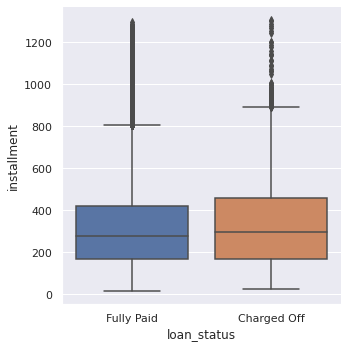

In [84]:
sns.catplot(x="loan_status", y="installment", kind="box", data=df6)       # Box Plot of loan installment amount and loan status

In the above four plots of Box plot the Interquartile range of charged-off i.e. defaulters category is higher then fully paid category

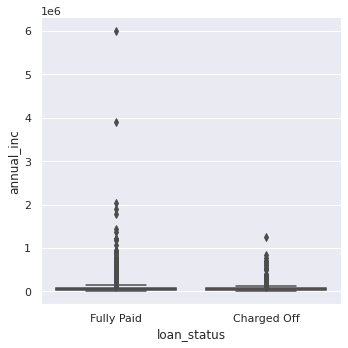

In [85]:
sns.catplot(x="loan_status", y="annual_inc", kind="box", data=df6)  # Box Plot of annual income and loan status

In the above plot the charged off category has the outliers which is of lesser value then fully paid category

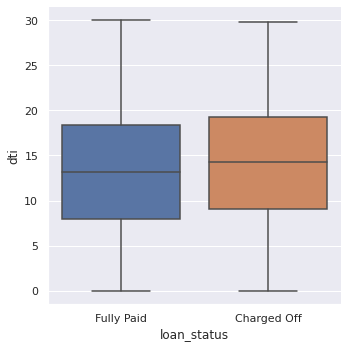

In [86]:
sns.catplot(x="loan_status", y="dti", kind="box", data=df6) # Box Plot of debt to income and loan status

In [87]:
df6

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           5000         5000           5000.0   36 months    7.90%   
...          ...          ...              ...         ...      ...   
38572       2500         2500           1075.0   36 months    8.07%   
38573       8500         8500            875.0   36 months   10.28%   
38574       5000         5000           1325.0   36 months    8.07%   
38575       5000         5000            650.0   36 months    7.43%   
38576       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+ years           RENT     24000.0   
1            59.83     C        C4   < 1 year           RENT     30000.0   
2            84.33     C        C5  10+ years           RENT     12252.0   
3           339.31     C        C1  10+ years           RENT     49200.0   
4           156.46     A        A4    3 years           RENT     36000.0   
...            ...   ...       ...        ...            ...         ...   
38572        78.42     A        A4    4 years       MORTGAGE    110000.0   
38573       275.38     C        C1    3 years           RENT     18000.0   
38574       156.84     A        A4   < 1 year       MORTGAGE    100000.0   
38575       155.38     A        A2   < 1 year       MORTGAGE    200000.0   
38576       255.43     E        E2   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status             purpose addr_state  \
0                Verified  Dec-11   Fully Paid         credit_card         AZ   
1         Source Verified  Dec-11  Charged Off                 car         GA   
2            Not Verified  Dec-11   Fully Paid      small_business         IL   
3         Source Verified  Dec-11   Fully Paid               other         CA   
4         Source Verified  Dec-11   Fully Paid             wedding         AZ   
...                   ...     ...          ...                 ...        ...   
38572        Not Verified  Jul-07   Fully Paid    home_improvement         CO   
38573        Not Verified  Jul-07   Fully Paid         credit_card         NC   
38574        Not Verified  Jul-07   Fully Paid  debt_consolidation         MA   
38575        Not Verified  Jul-07   Fully Paid               other         MD   
38576        Not Verified  Jun-07   Fully Paid  debt_consolidation         MA   

         dti  mths_since_last_delinq  pub_rec_bankruptcies  int_rate_new  
0      27.65                     NaN                   0.0         10.65  
1       1.00                     NaN                   0.0         15.27  
2       8.72                     NaN                   0.0         15.96  
3      20.00                    35.0                   0.0         13.49  
4      11.20                     NaN                   0.0          7.90  
...      ...                     ...                   ...           ...  
38572  11.33                     0.0                   NaN          8.07  
38573   6.40                     5.0                   NaN         10.28  
38574   2.30                     0.0                   NaN          8.07  
38575   3.72                     0.0                   NaN          7.43  
38576  14.29                    11.0                   NaN         13.75  

[38577 rows x 20 columns]

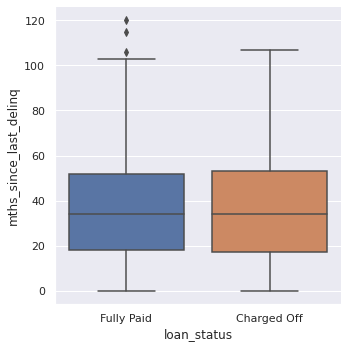

In [88]:
sns.catplot(x="loan_status", y="mths_since_last_delinq", kind="box", data=df6) # Box Plot of months last delinquent and loan status

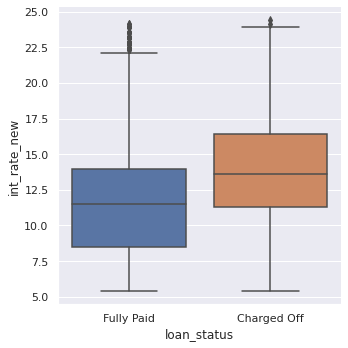

In [89]:
sns.catplot(x="loan_status", y="int_rate_new", kind="box", data=df6)  # Box Plot of Interest rate and loan status

The charged off category(defaulters) has the 25th percentile and 75th percentile greater then fully paid category

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



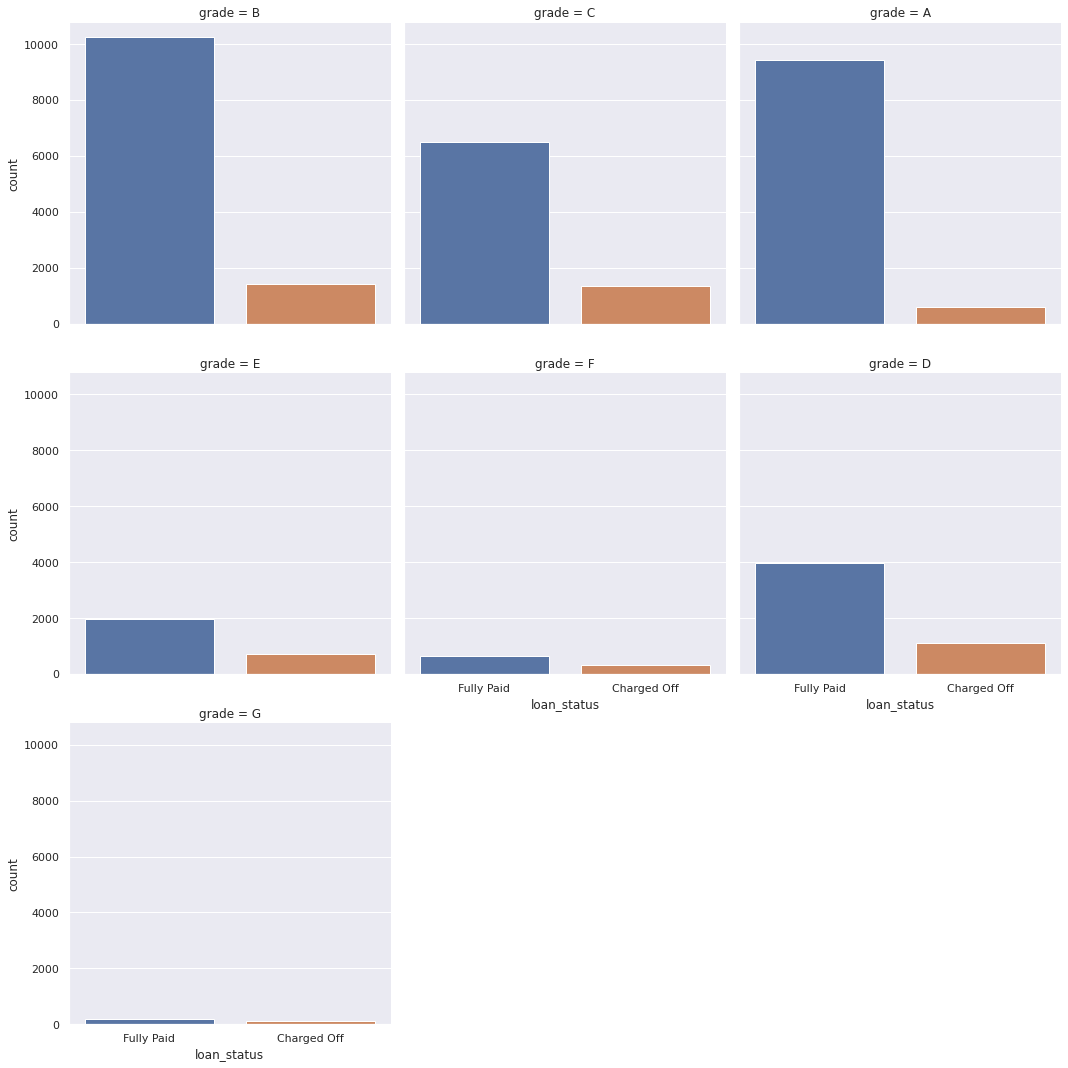

In [127]:
sns.factorplot("loan_status", col = "grade", col_wrap = 3,data = df6,kind = "count") #Count plot of grade and loan status
plt.show()

The employee grade B,F of employee has the most of charged-off category(defaulters)

In [99]:
sns.set(rc={'figure.figsize':(20.7,10.27)})

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



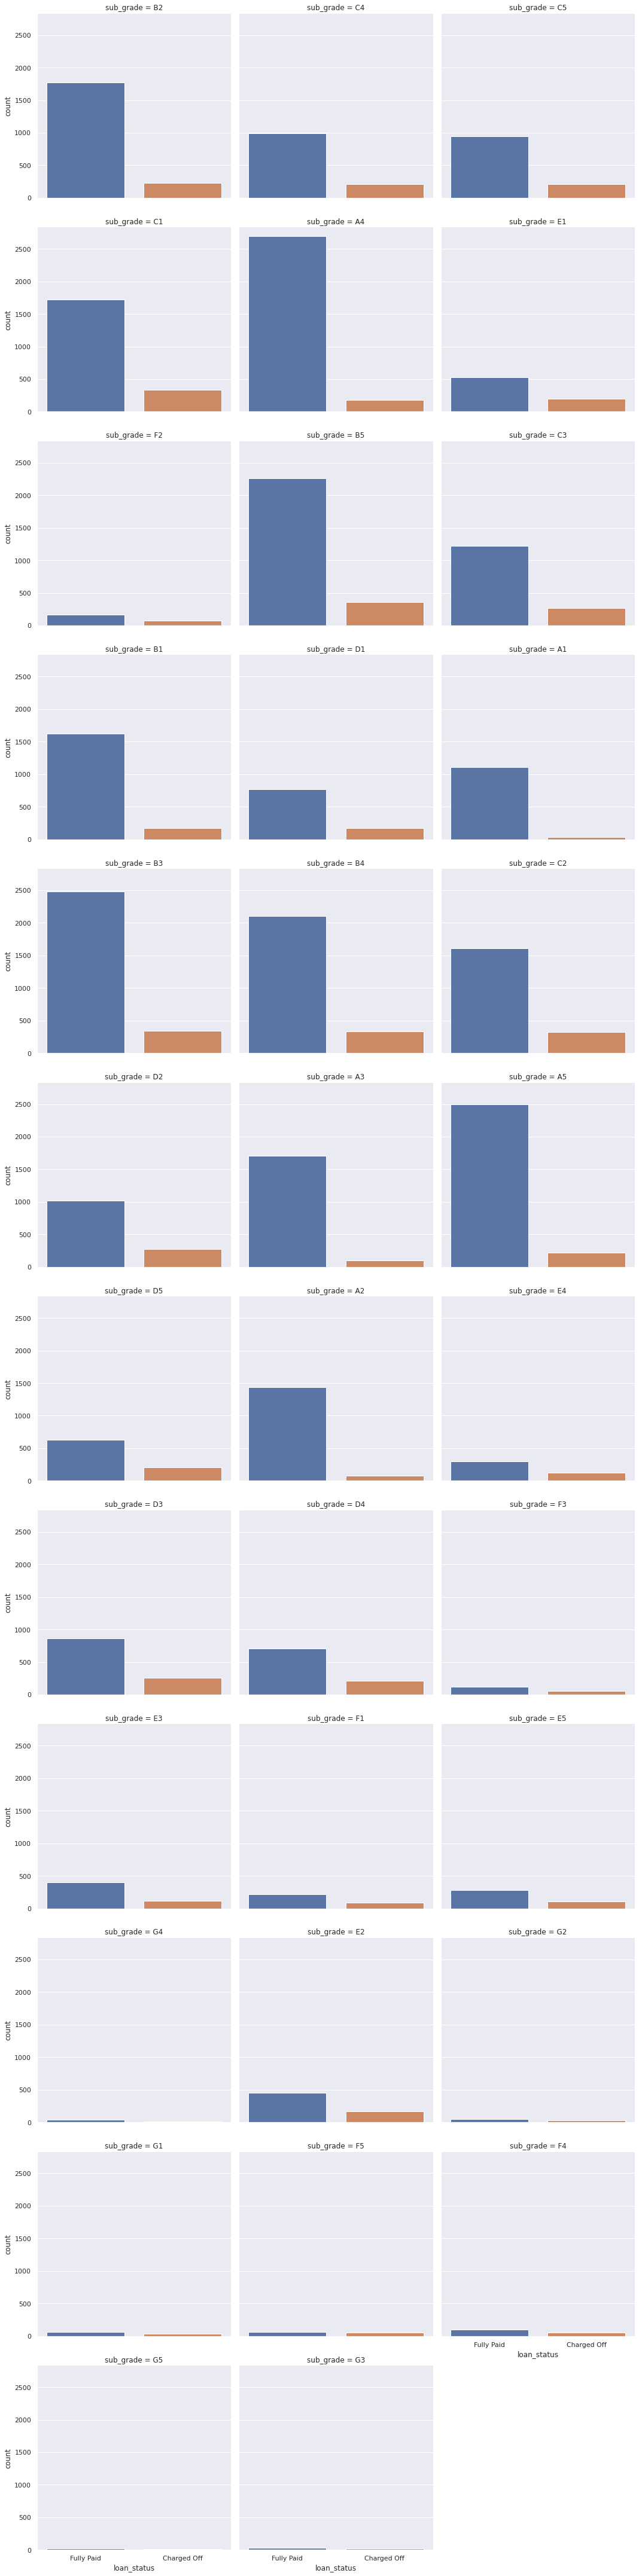

In [115]:
sns.factorplot("loan_status", col = "sub_grade", col_wrap = 3,data = df6,kind = "count")  #Count plot of sub-grade and loan status
plt.show()

The employee sub-grade C1,B5,B3 of employee has the most of charged-off category(defaulters)

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



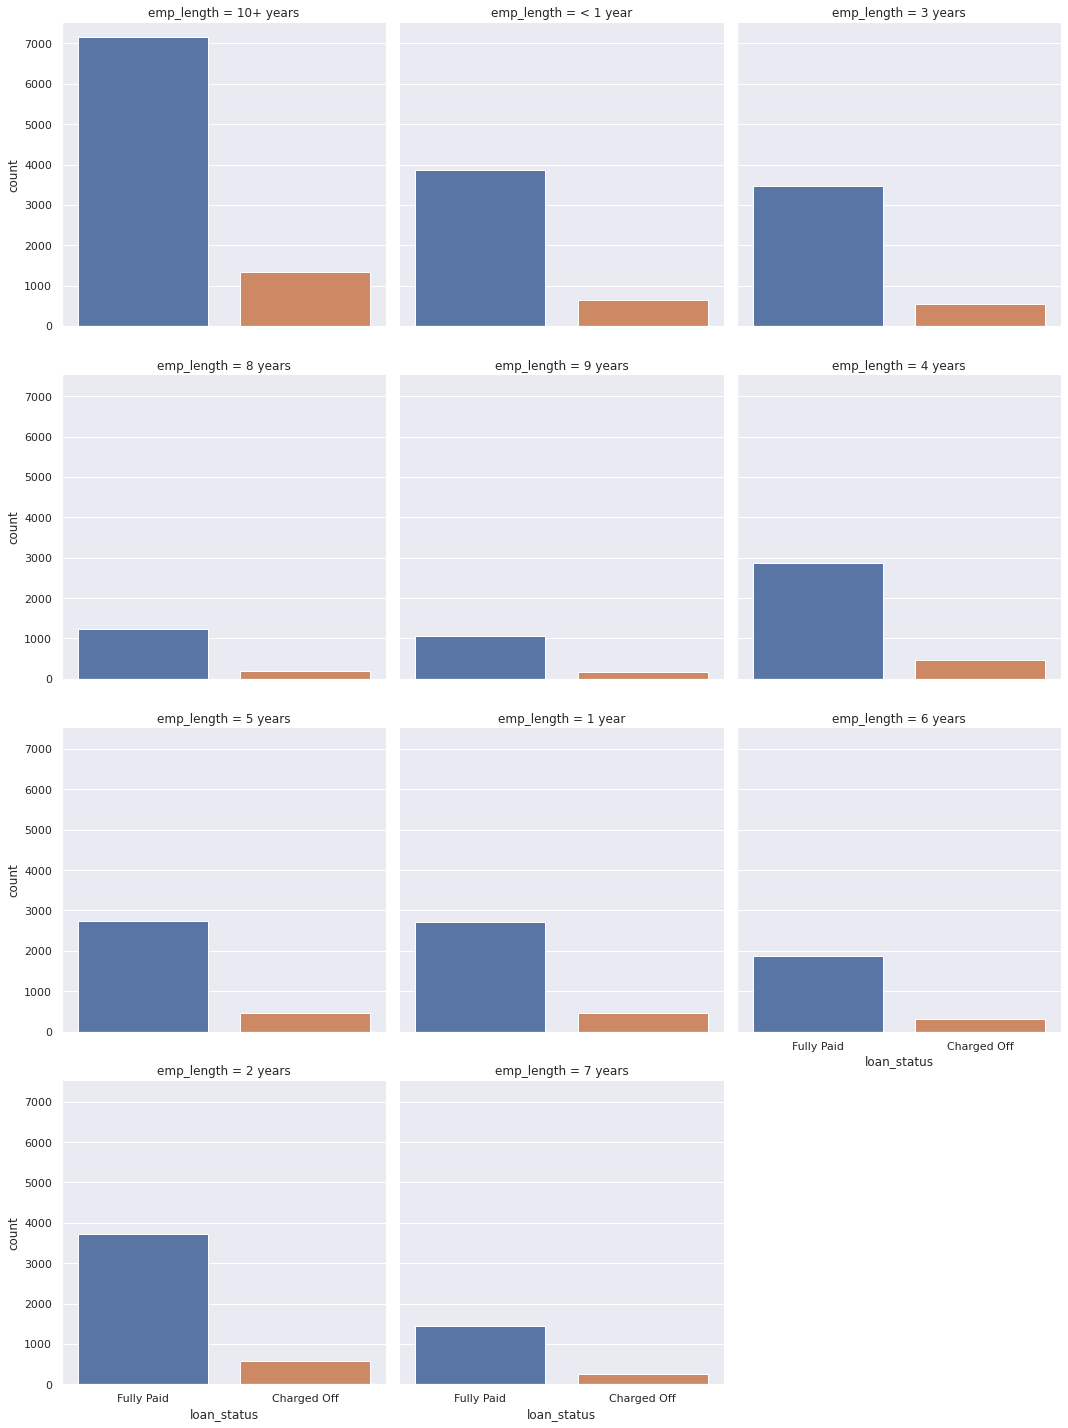

In [128]:
sns.factorplot("loan_status", col = "emp_length", col_wrap = 3,data = df6,kind = "count")     #Count plot of employee term and loan status
plt.show()

The employee of term 10+years has the most of charged-off category(defaulters)

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



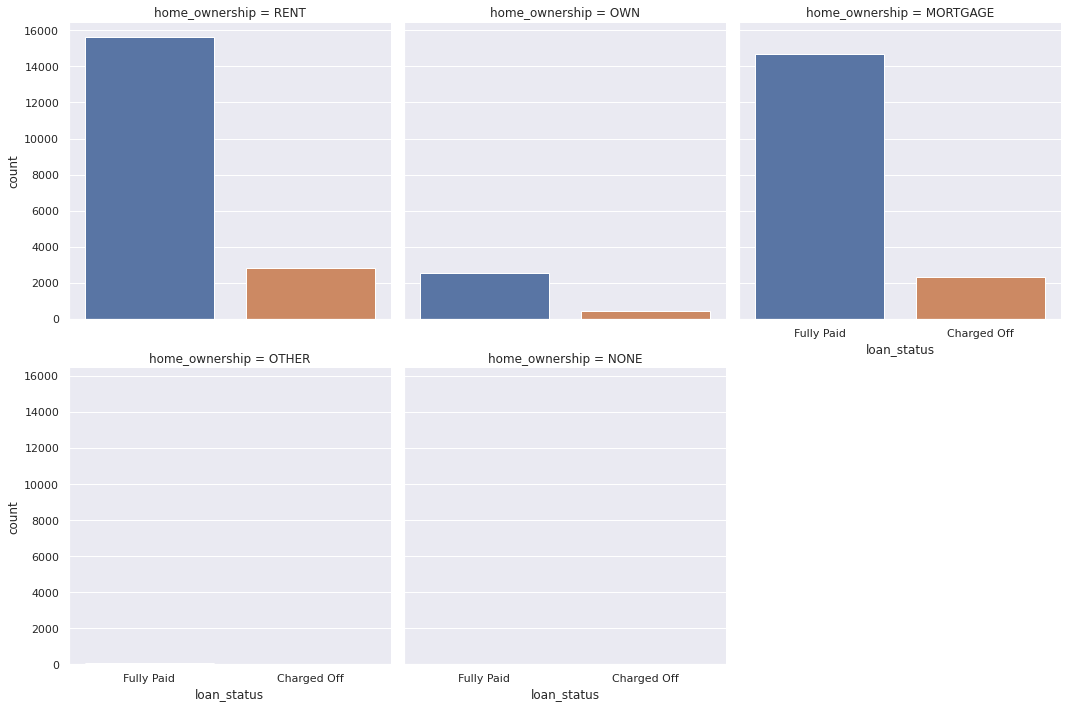

In [129]:
sns.factorplot("loan_status", col = "home_ownership", col_wrap = 3,data = df6,kind = "count") #Count plot of home ownership and loan status
plt.show()

The most of loan applicants who are of rent category in home ownership has the most of charged-off category(defaulters) while applicants with own house have minimum charged off category.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



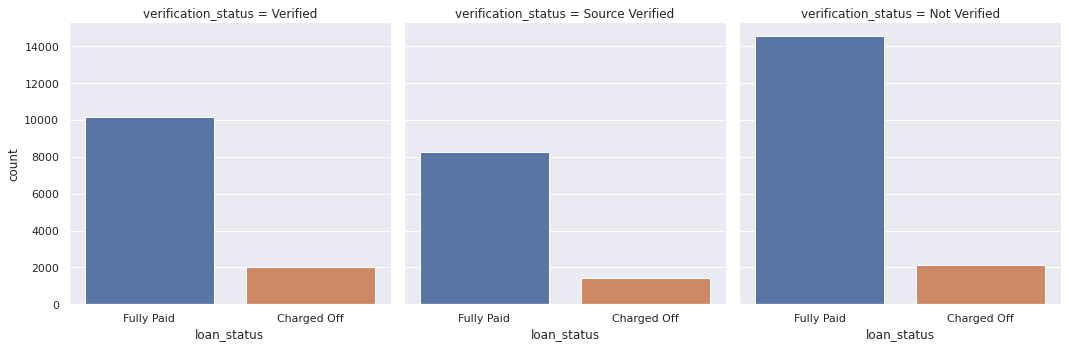

In [130]:
sns.factorplot("loan_status", col = "verification_status", col_wrap = 3,data = df6,kind = "count") #Count plot of verification status and loan status
plt.show()

The loan applicants of source verified has the less charged off applicants.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



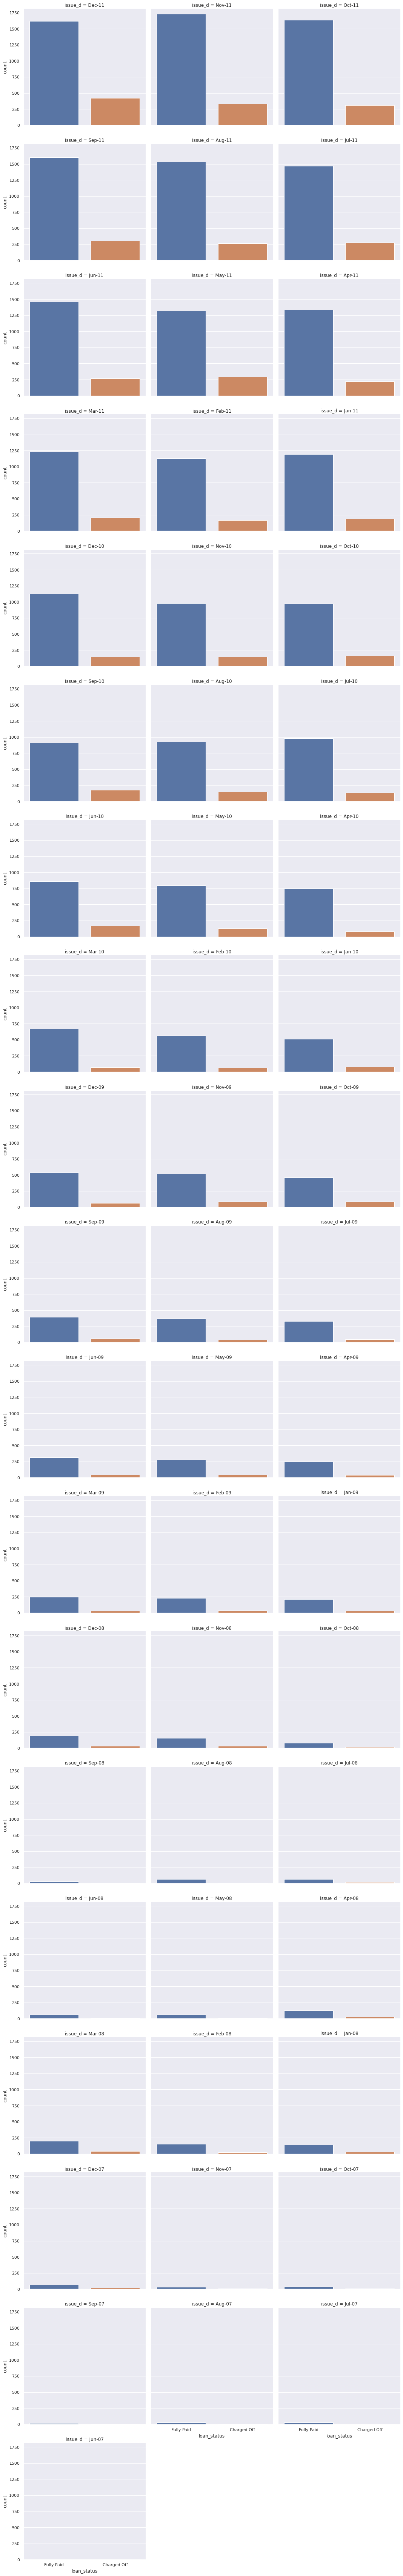

In [131]:
sns.factorplot("loan_status", col = "issue_d", col_wrap = 3,data = df6,kind = "count") #Count plot of issue date and loan status
plt.show()

The loan leased in 2011 year has the most charged off category specifically in December month 

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



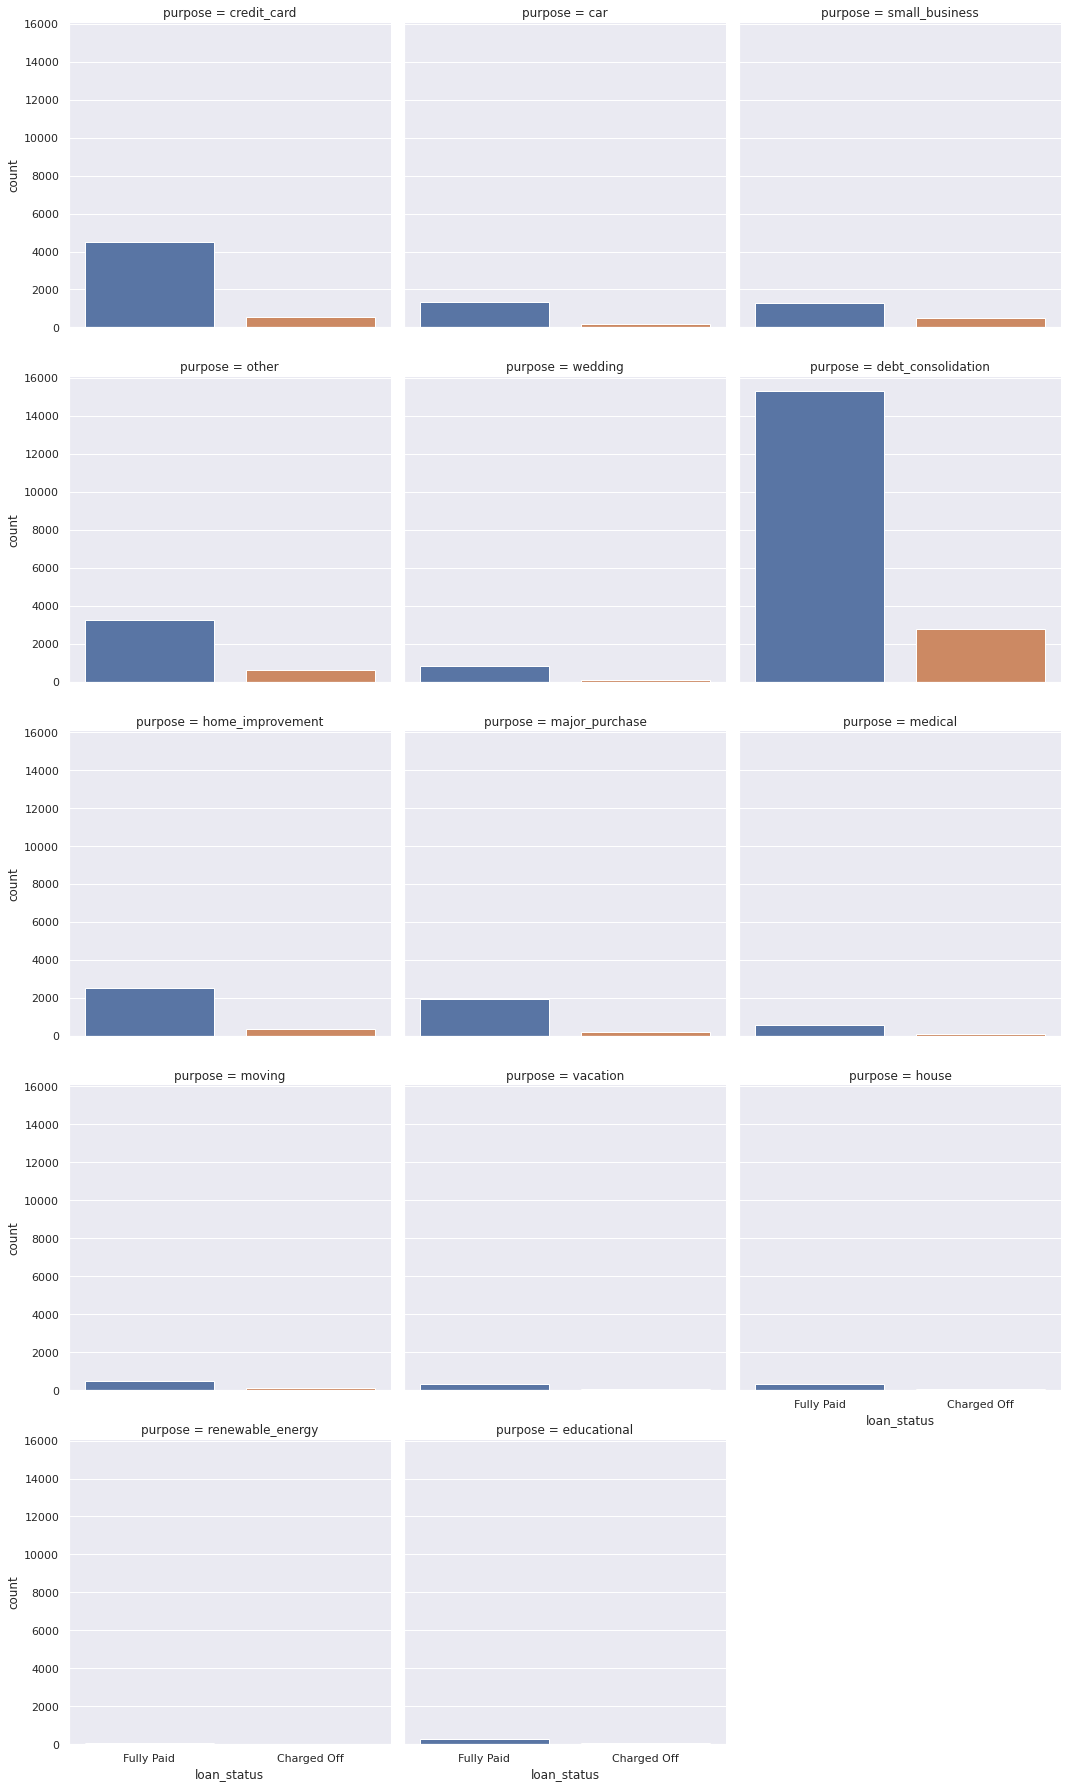

In [133]:
sns.factorplot("loan_status", col = "purpose", col_wrap = 3,data = df6,kind = "count")  #Count plot of purpose of loan and loan status
plt.show()

The loan applicants with the purpose of debt consolidation has the maximum charged off category

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/sridhatta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



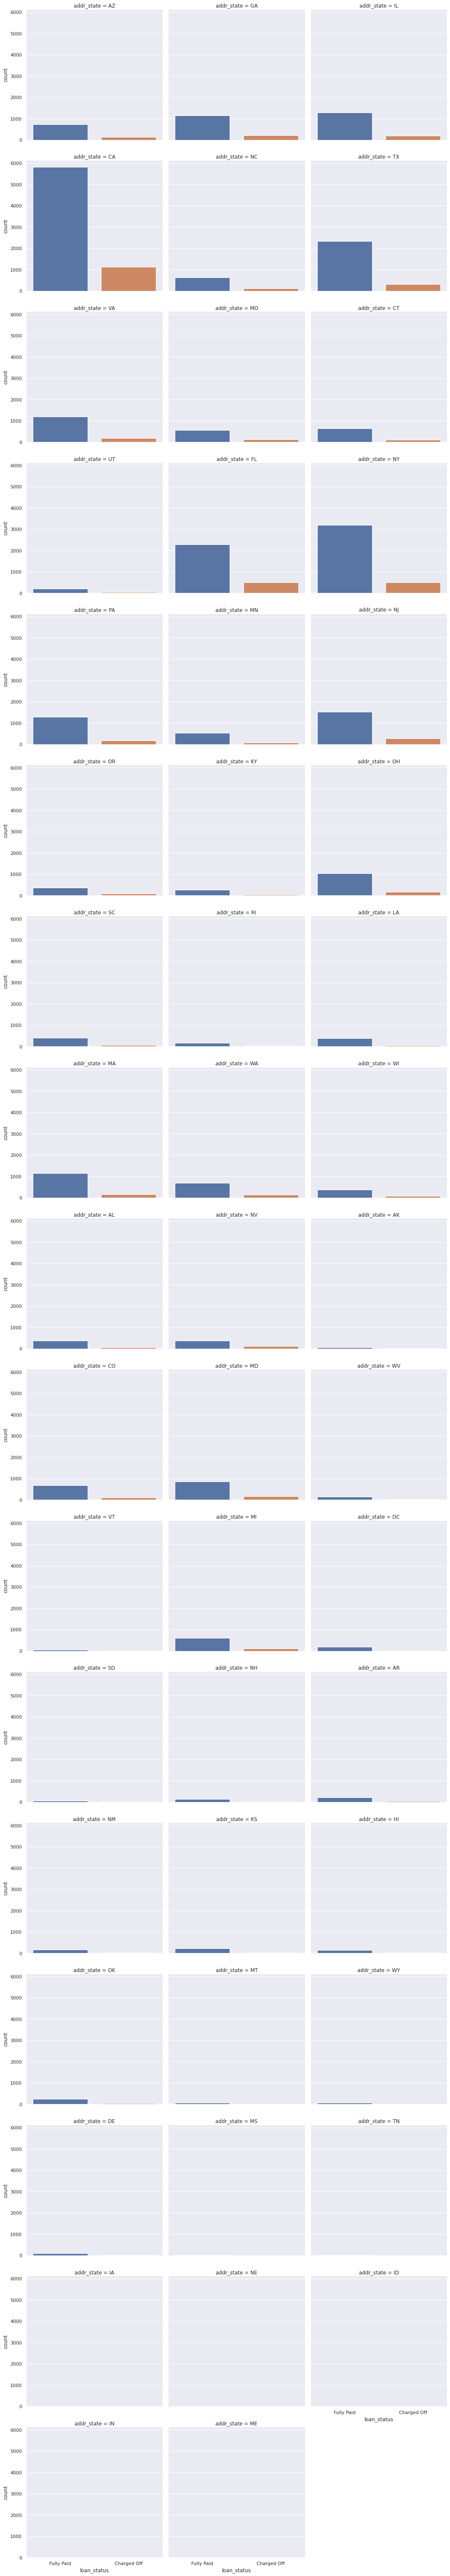

In [134]:
sns.factorplot("loan_status", col = "addr_state", col_wrap = 3,data = df6,kind = "count") #Count plot of address state and loan status
plt.show()

The loan applicants of CA has the maximum charged off category.